In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [2]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 9000

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [3]:
# crystal asymmetry angle
alphaAsym = 19.88*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = 2.898
# distance between CRLs and focus
f2 = 3

# crystal reflection hkl index
hkl = [3,1,1]

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=819.9, FOV=2e-3, N=256)
crl0 = optics.CRL('crl0', z=819.95, roc=1667e-6, diameter=5e-3)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=820, E0=E0,
                          alphaAsym=0, orientation=0, pol='s')

# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='s')
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

# CRL with ~1 meter focal length (modeled as single element for now)
crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=25.25e-6, diameter=5e-3)

# viewing point downstream of first crl
im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

# viewing point at focus
focus = optics.PPM('focus', z=crl1.z+f2+.128, FOV=100e-6, N=256)

# slit at focus
slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3+.128, x_width=4e-6, y_width=2e-3)

# second CRL with ~1 meter focal length, for collimation
crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=25.25e-6, diameter=5e-3)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+.15, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='s')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+.15 + (f1-.15)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='s')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus,slit, crl2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
x is focused
y is focused
b 1.00
b 8.07
crystal 2 incidence angle: 44.76 degrees
crystal 2 exit angle: 5.01 degrees
b 1.00
b 0.12
after c1: 0.87
after c2: -0.00
after c3: -0.87
after c4: -0.00


In [22]:
(f1-.15)*np.cos(crystal1.beta0*2)+.15

1.9254013991000398

In [23]:
print(crl2.orientation)

0


In [9]:
for item in mono_beamline.full_list:
    print(item)
print(mono_beamline.full_list[7].dz)
print(mono_beamline.full_list[9].dz)
print(mono_beamline.full_list[10].global_x)
print(mono_beamline.full_list[19].dz)
print(mono_beamline.full_list[21].dz)
print(1/np.cos(crystal1.beta0*2))
print(crystal1.beta0)

2.798000035877466
0.10000000128227662
1.1809518527125447
0.1500000019233581
2.748520035718253
1.5478189897749182
0.4341857651913606


In [25]:
print('crystal 1 incidence angle: {:.2f} degrees'.format(crystal1.alpha*180/np.pi))
print('crystal 1 exit angle: {:.2f} degrees'.format(crystal1.beta0*180/np.pi))

crystal 1 incidence angle: 24.88 degrees
crystal 1 exit angle: 24.88 degrees


### Propagation through monochromator at central photon energy

FWHM in x: 655.2898625941441 microns
FWHM in y: 655.2898625941441 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721895.91 microns
zRy: 73721895.91 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.034806
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43310689344.02 microns
zRy: 73721895.91 microns
remaining distance: 50000.00 microns
goal for zx: 4604084806.41 microns
current zx: 4604034806.41 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4604.084806
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated dis

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


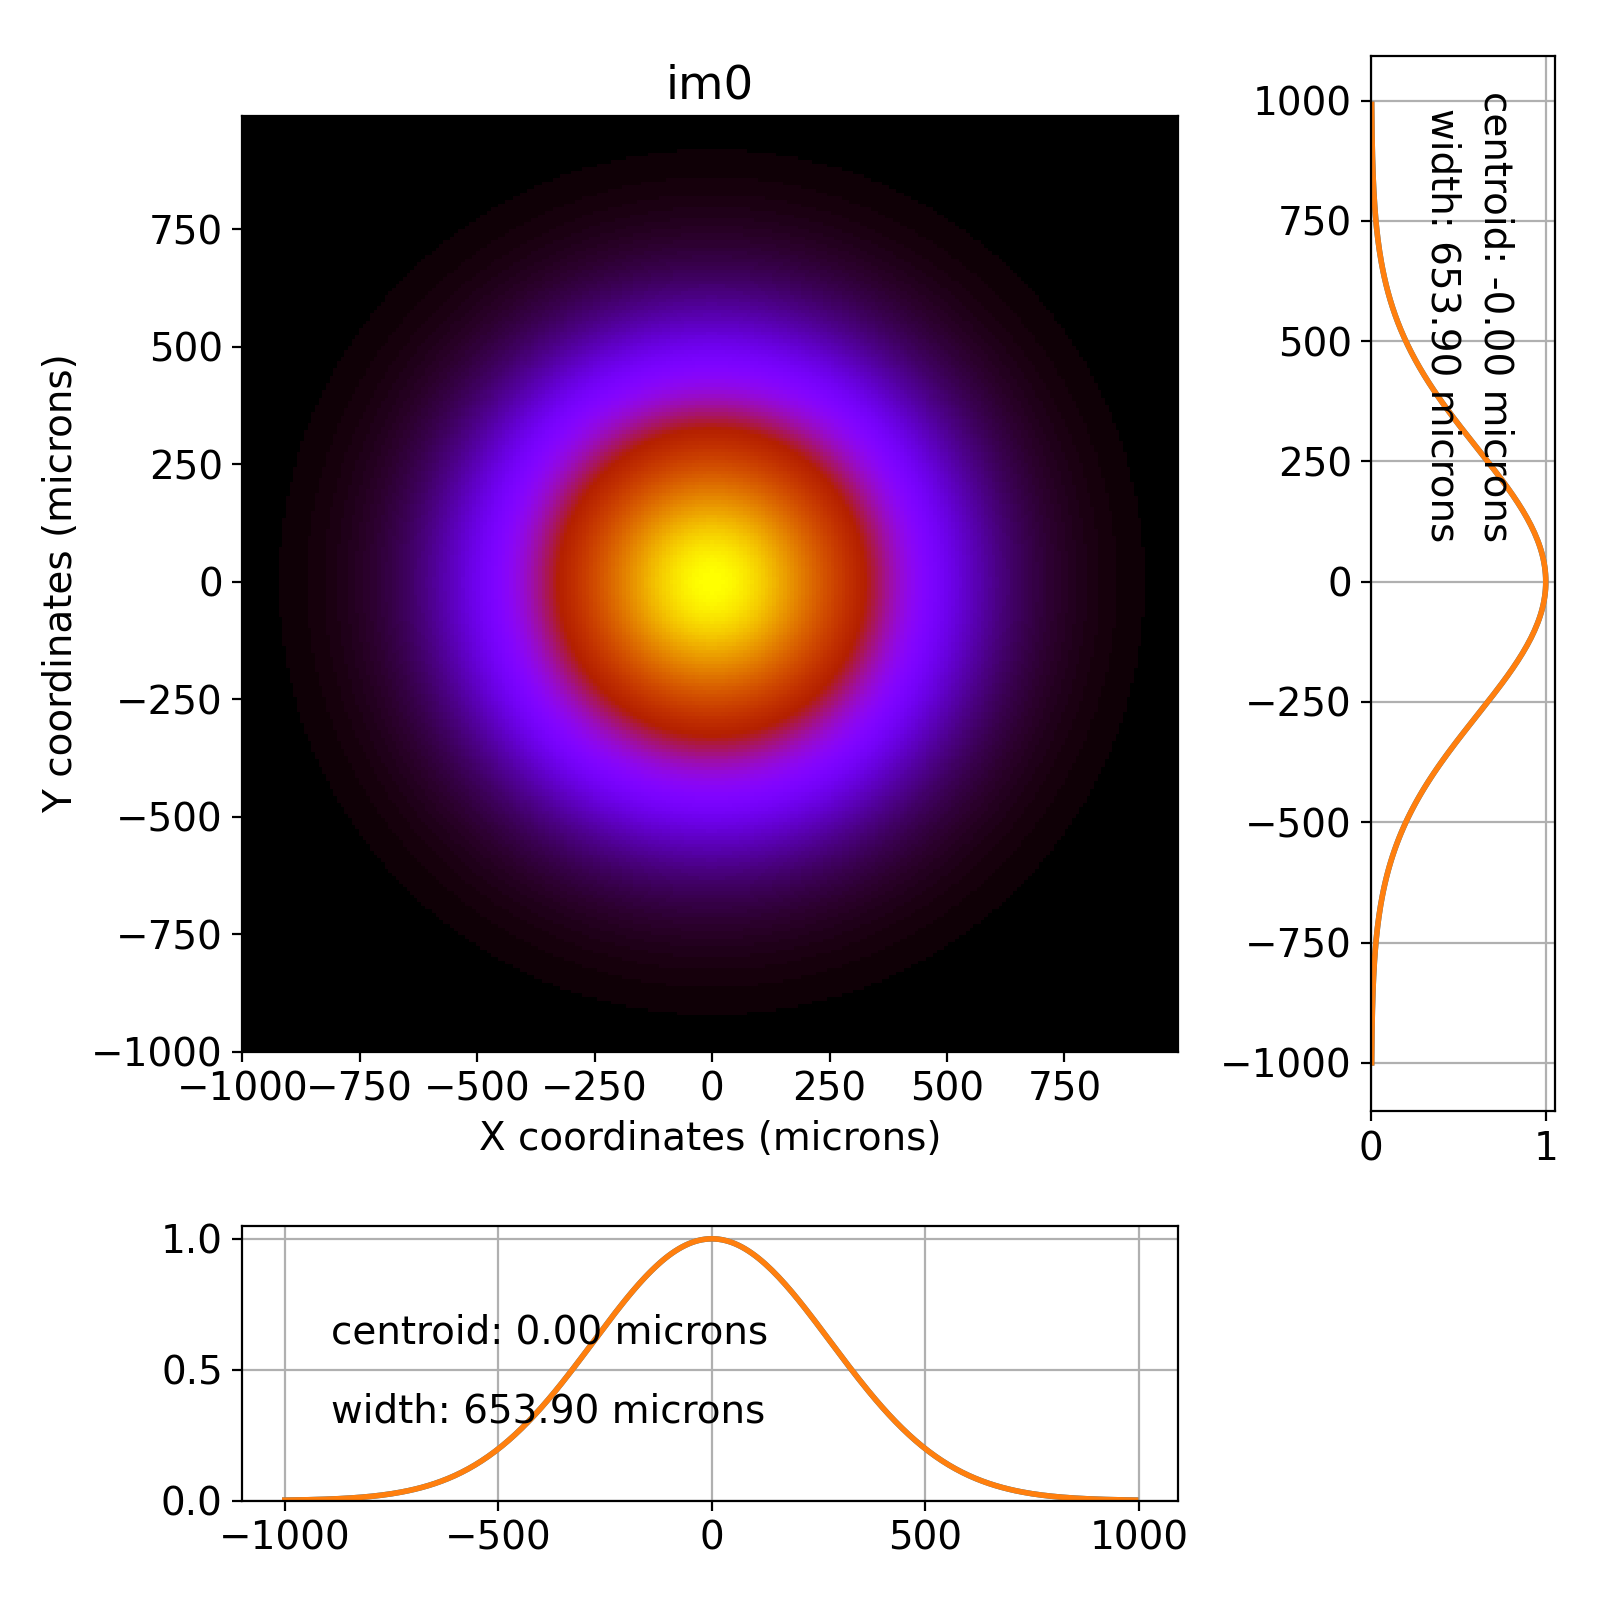

<IPython.core.display.Javascript object>


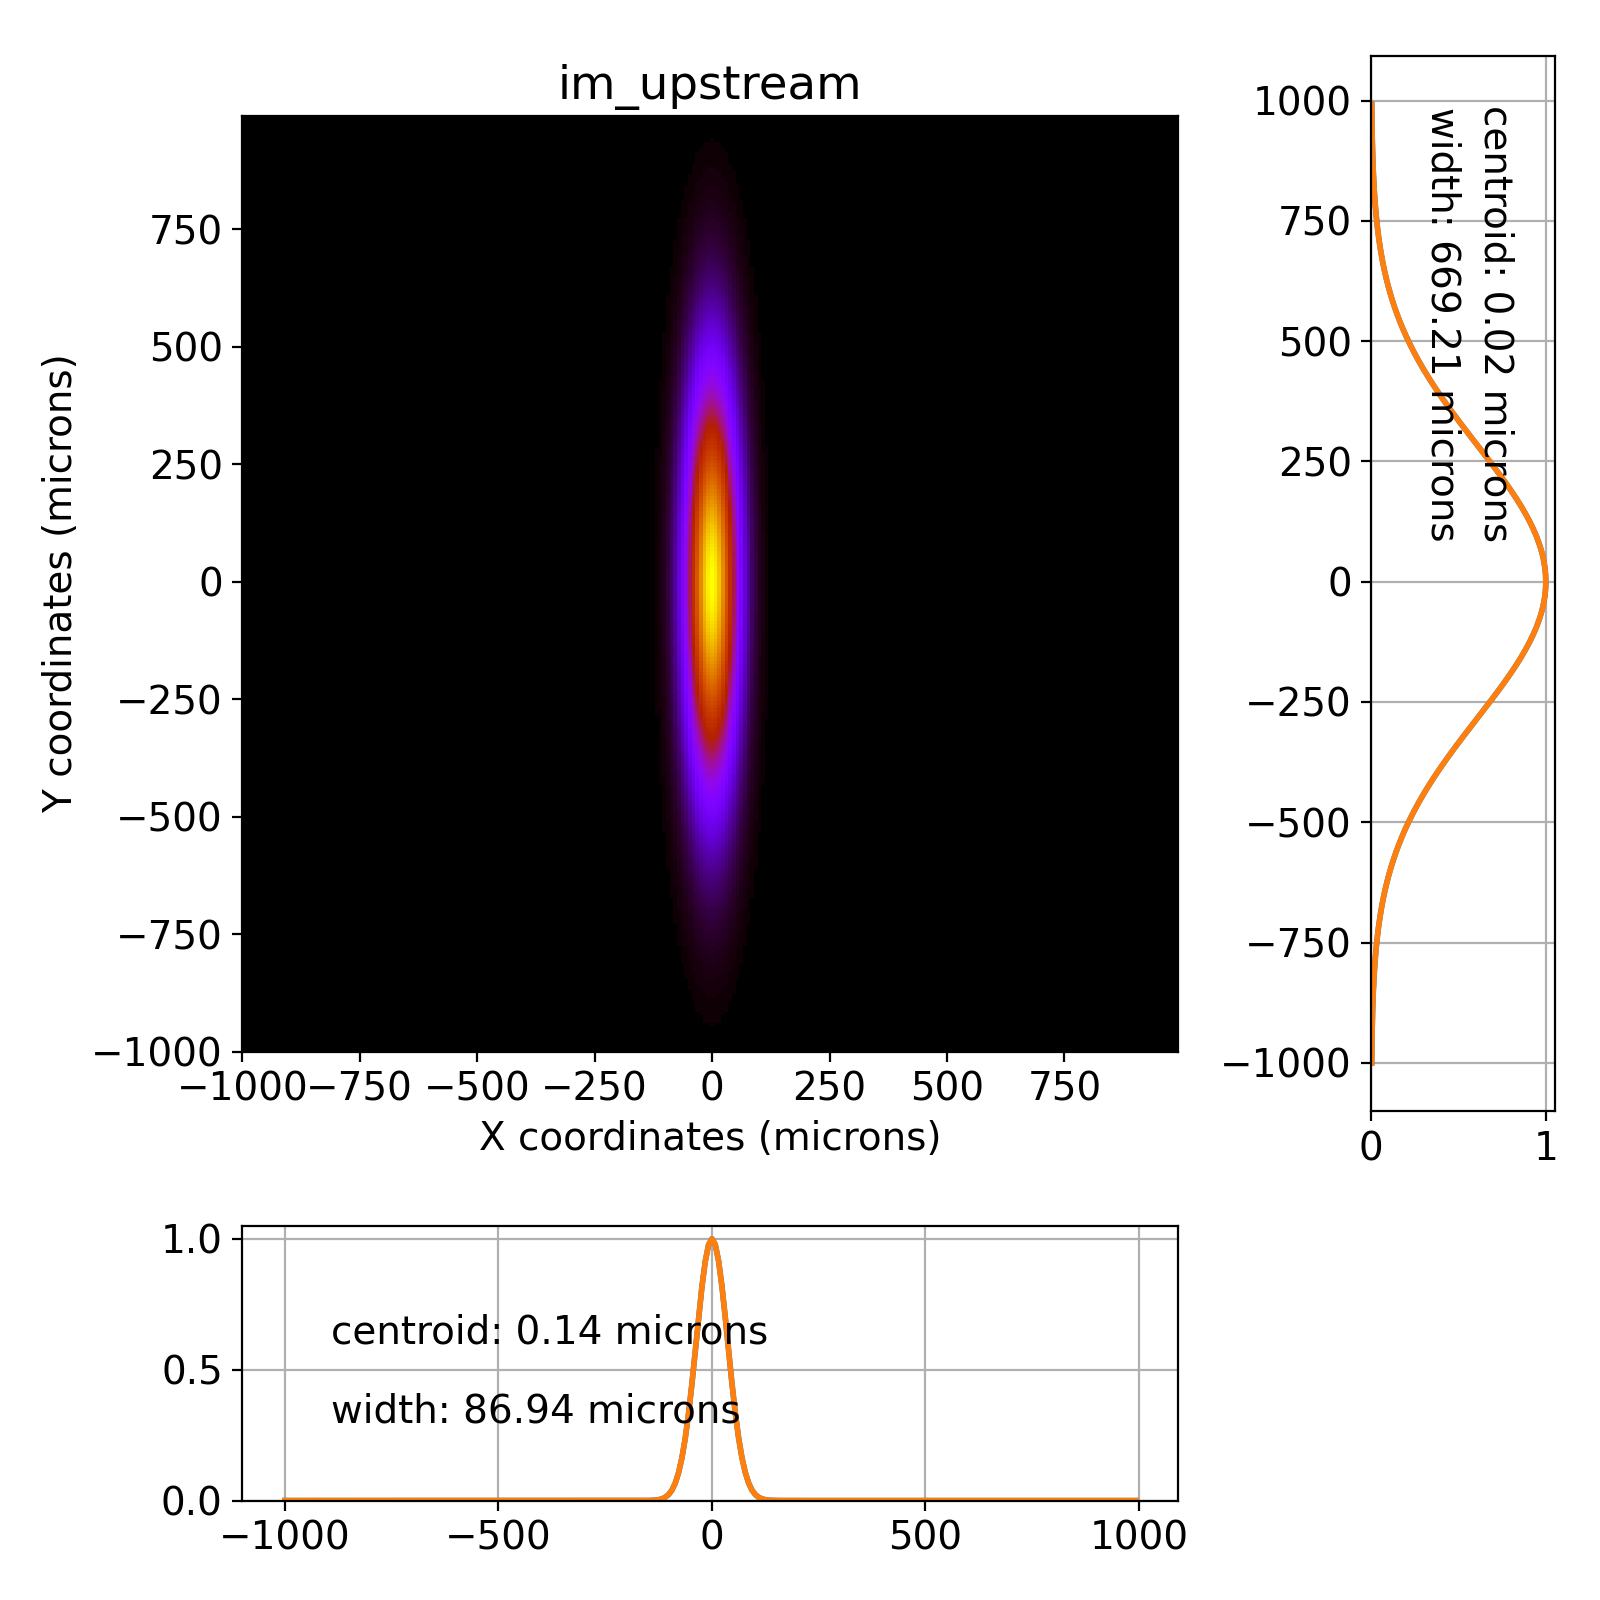

<IPython.core.display.Javascript object>


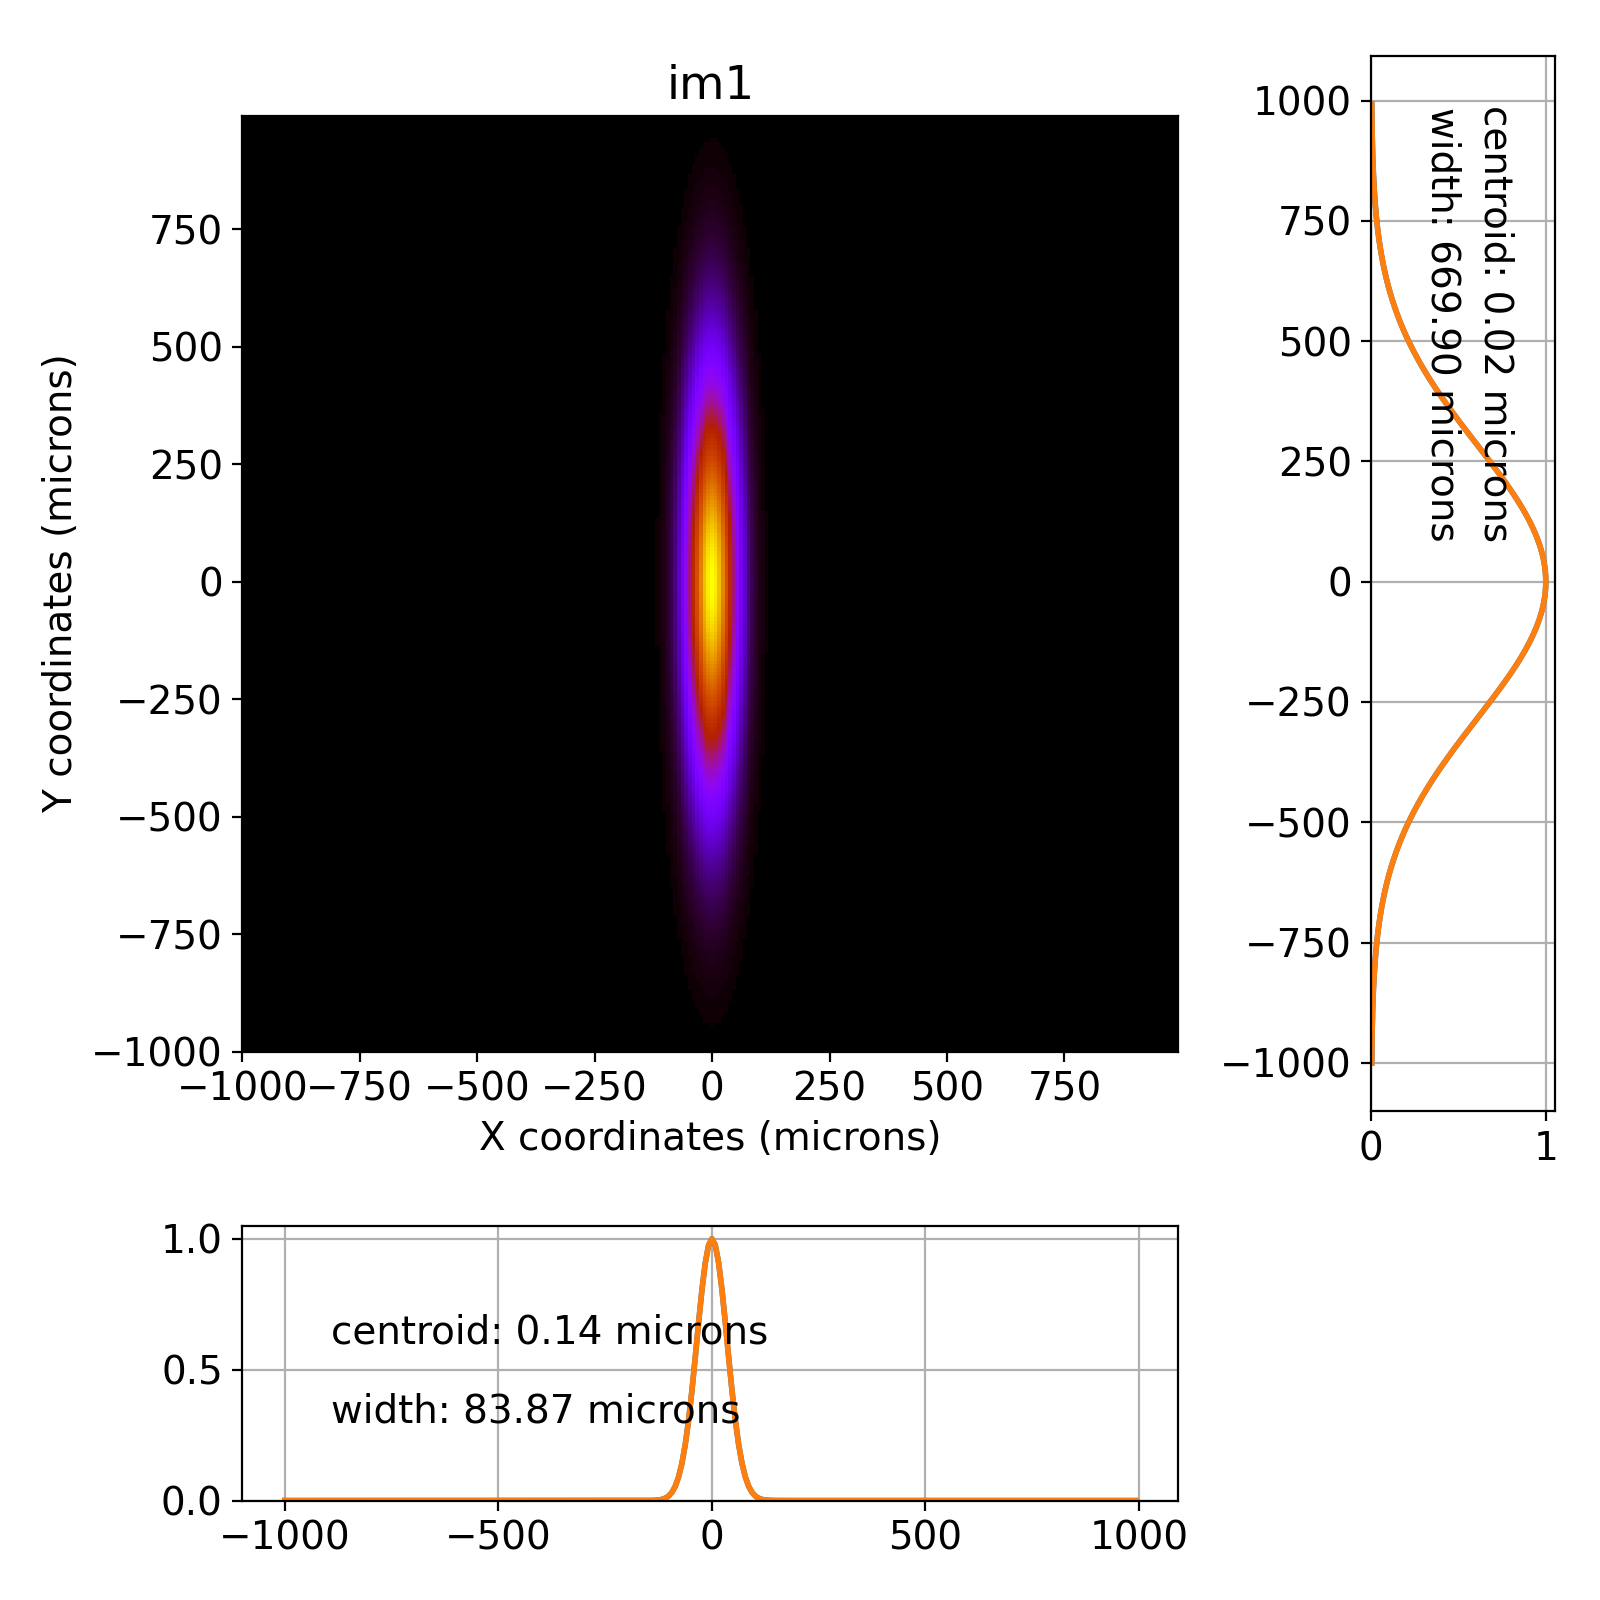

<IPython.core.display.Javascript object>


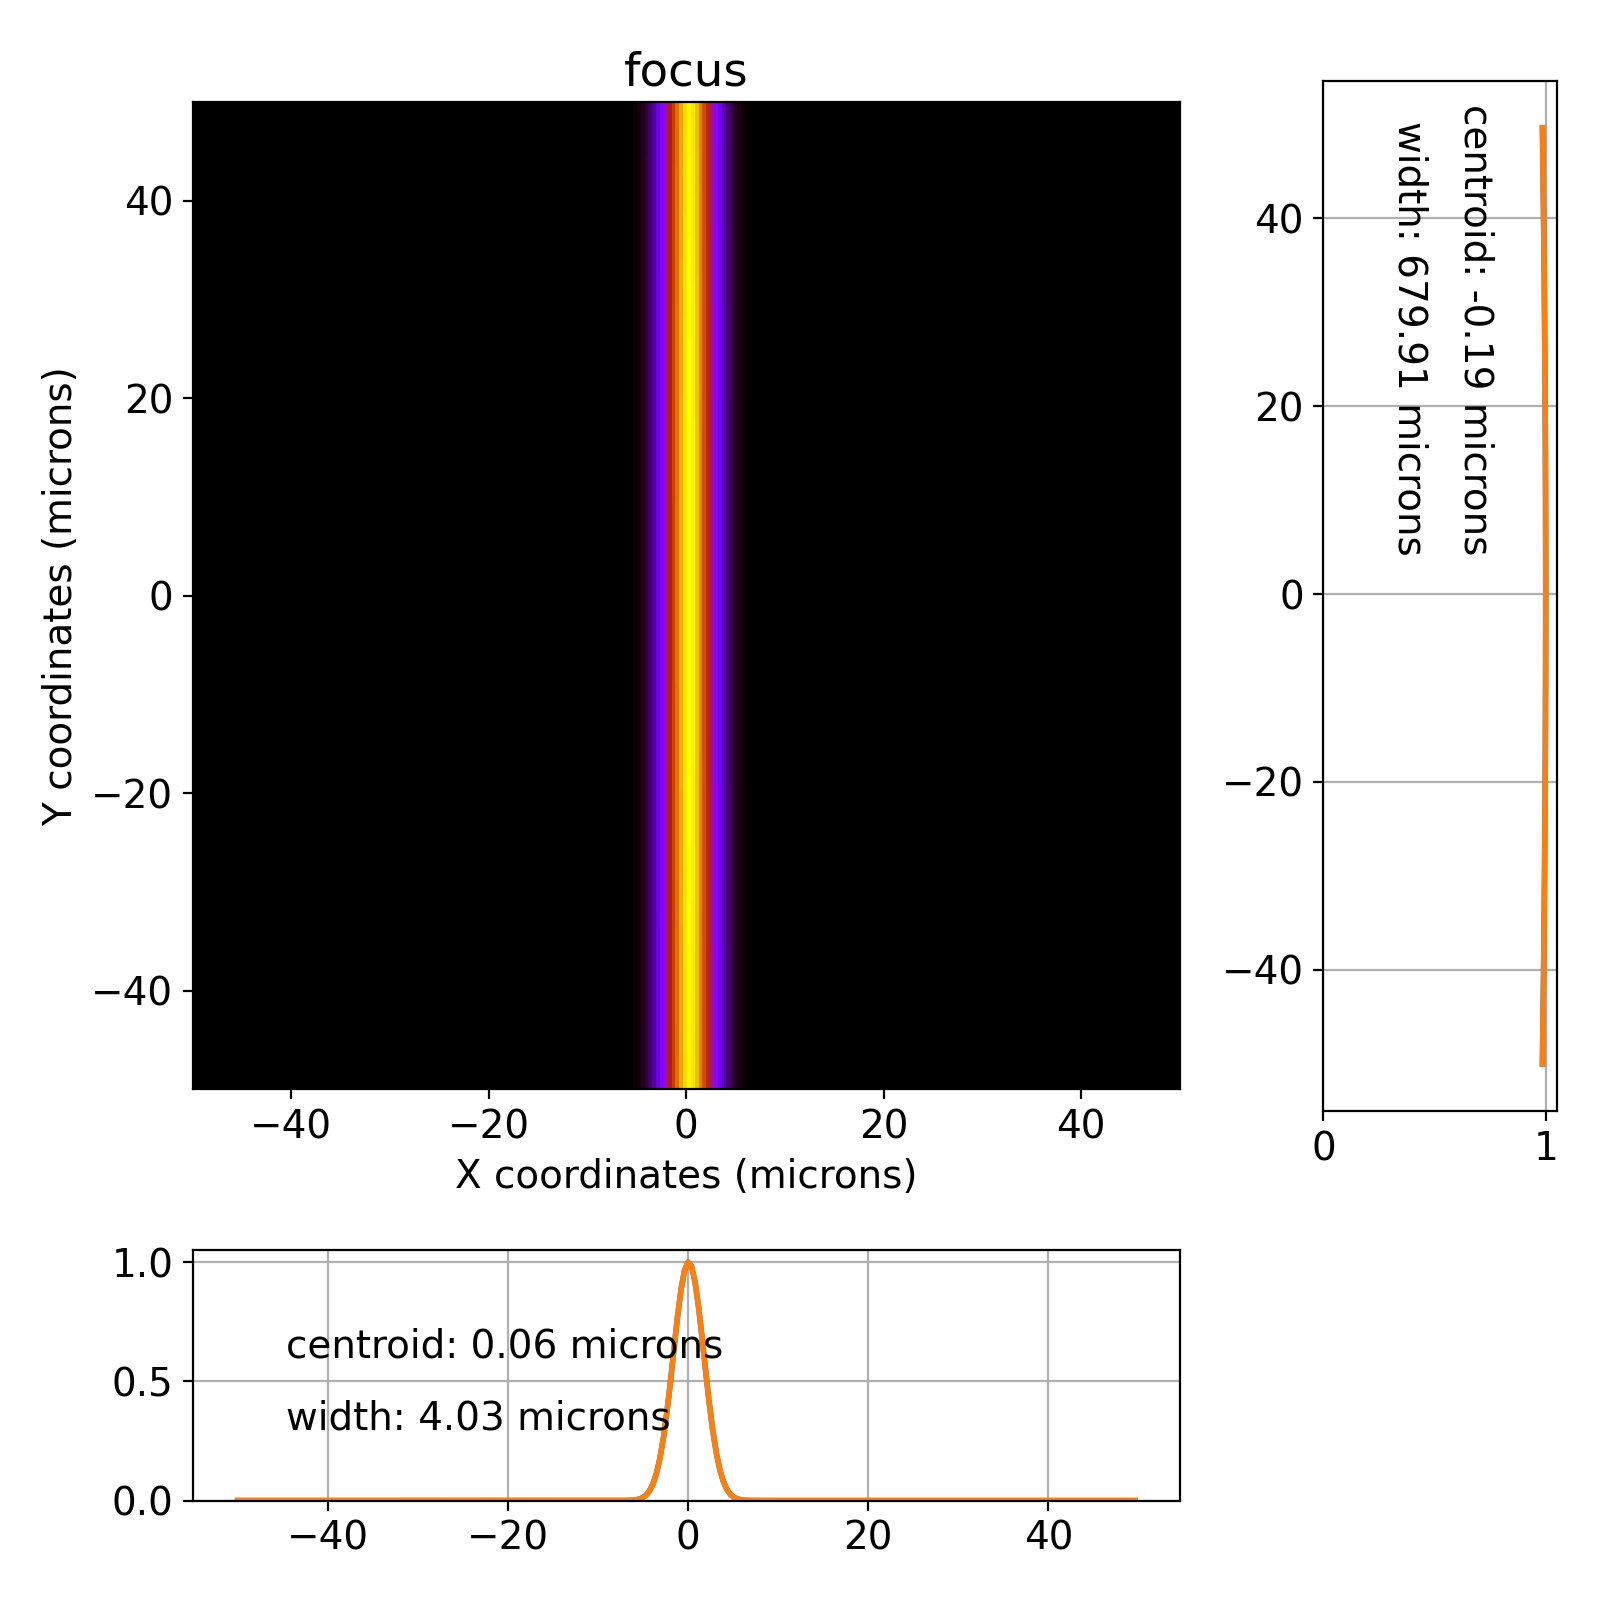

<IPython.core.display.Javascript object>


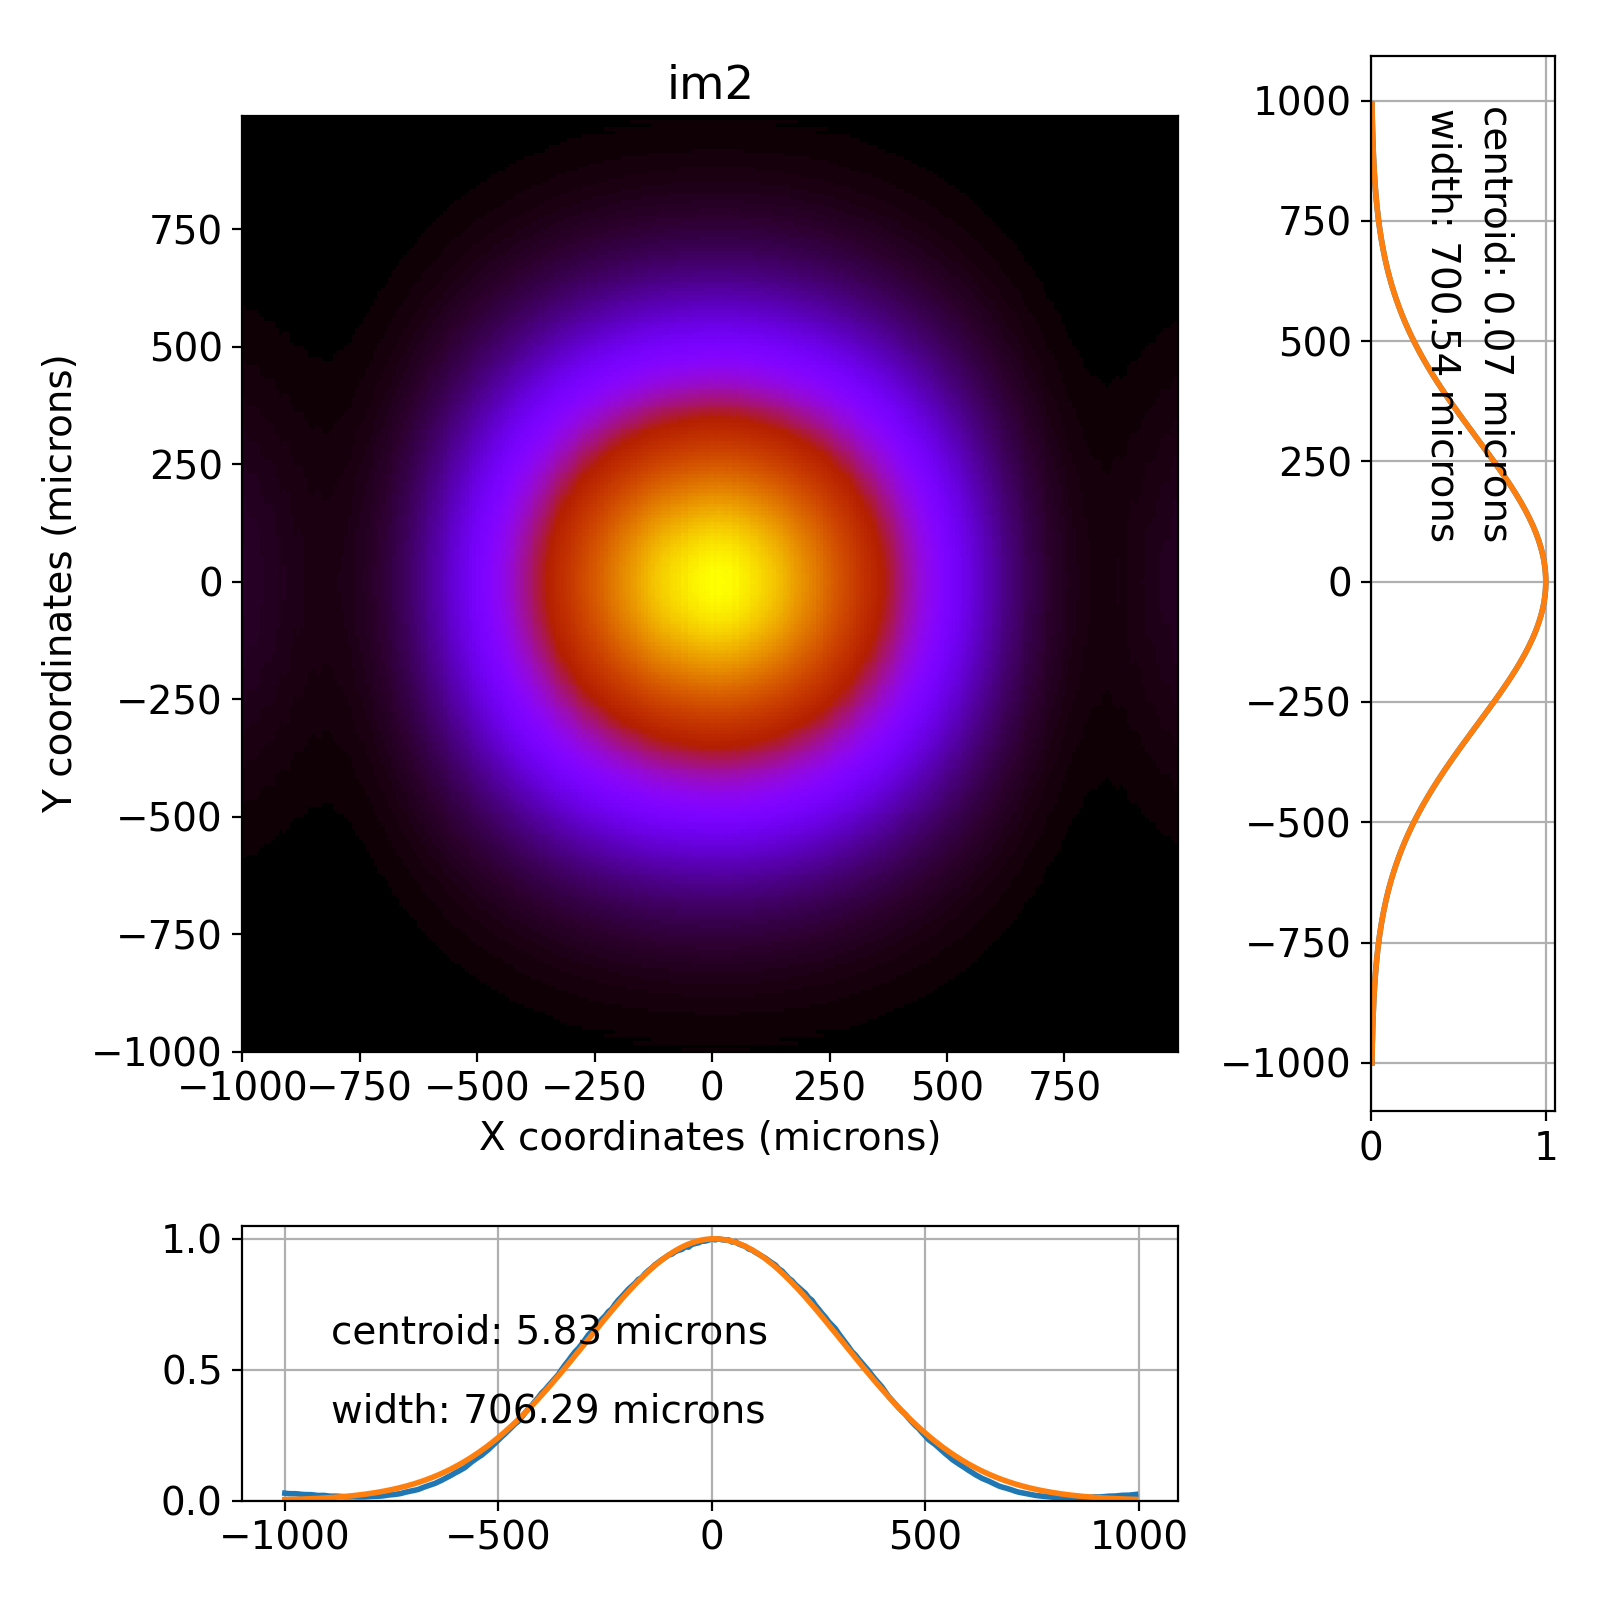

In [26]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im_upstream.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

<IPython.core.display.Javascript object>


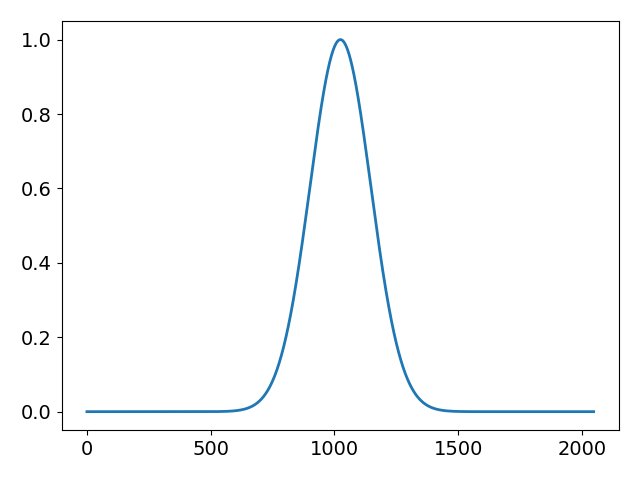

In [74]:
plt.figure()
plt.plot(np.abs(b2.wavey))

## Time-domain propagation

In [27]:
# reset central photon energy
beam_params['photonEnergy'] = 9000

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=40, time_window=4000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 224


In [28]:
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
x is focused
y is focused
FWHM in x: 655.2983203753022 microns
FWHM in y: 655.2983203753022 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131184831651854
5.131184831651854
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73720945.09 microns
zRy: 73720945.09 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4606.629364
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43358958475.96 microns
zRy: 73720945.09 microns
remaining distance: 50000.00 microns
goal for zx: 4606679363.56 microns
current zx: 4606629363.56 microns
goal fo

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131185426057268
5.131185426057268
x is focused
y is focused
FWHM in x: 655.2982445197915 microns
FWHM in y: 655.2982445197915 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131185426057268
5.131185426057268
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73720953.62 microns
zRy: 73720953.62 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4606.606081
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43358525207.65 microns
zRy: 73720953.62 microns
remaining distance: 50000.00 microns
goal for zx: 4606656080.99 microns
current zx: 4606606080.99 microns
goal fo

zx: 4606.609517
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4606.609517
zRx: 4.34e+04
zRy: 7.37e+01
zx: 4606.609517
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43357658690.68 microns
zRy: 73720970.67 microns
remaining distance: 1547818.99 microns
goal for zx: 4608157335.56 microns
current zx: 4606609516.57 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4608.157336
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.793771
zRx: 2.83e+06
zRy: 7.37e+01
zx: 70.760452
zy: 191.547819
azimuth -0.12 mrad
drift4
delta z: 0.00
zRx: 2826822744928.02 microns
zRy: 73720970.67 microns
remaining distance: 2798000.02 microns
goal for zx: 73558451.77 microns
current zx: 70760451.75 microns
goal for zy: 194345819.01 microns
current zy: 191547818.99 microns
current step size: 2798000.02 microns
x remains focused
y stays unfocused
zx: 73.5584

zx: -3.028362
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028362
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722238326.39 microns
zRy: 73720987.73 microns
remaining distance: 3028000.04 microns
goal for zx: -362.22 microns
current zx: -3028362.26 microns
goal for zy: 197573819.05 microns
current zy: 194545819.01 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000362
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000362
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722238326.39 microns
zRy: 73720987.73 microns
remaining distance: 1000.00 microns
goal for zx: 637.78 microns
current zx: -362.22 microns
goal for zy: 197574819.05 microns
current zy: 197573819.05 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000638
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000638
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 722238326.39 microns
zRy: 73720987.73 microns
remaining di

zx: -0.000364
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722223989.84 microns
zRy: 73721004.78 microns
remaining distance: 1000.00 microns
goal for zx: 636.18 microns
current zx: -363.82 microns
goal for zy: 197574819.05 microns
current zy: 197573819.05 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000636
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000636
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 722223989.84 microns
zRy: 73721004.78 microns
remaining distance: 2871000.04 microns
goal for zx: 2871636.21 microns
current zx: 636.18 microns
goal for zy: 200445819.09 microns
current zy: 197574819.05 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871636
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.660435
zy: 200.445819
azimuth -0.20 mrad
drift10
delta z: 2.42
zRx: 591514487.90 microns
zRy: 73721004.78 microns


zx: 69.563518
zy: 203.344302
azimuth -868.49 mrad
c4
Calculated distance to focus: -4539.440881
zRx: 9.82e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4543.661381
zy: 203.344302
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41885155328.27 microns
zRy: 73721021.84 microns
remaining distance: 100026.57 microns
goal for zx: 4543761407.17 microns
current zx: 4543661380.59 microns
goal for zy: 203444328.44 microns
current zy: 203344301.86 microns
current step size: 100026.57 microns
x becomes focused
y stays unfocused
zx: 4543.761407
zy: 203.444328
azimuth -0.12 mrad
im2
zx: 4543.761407
zy: 203.444328
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131190775705999
5.131190775705999
x is focused
y is focused
FWHM in x: 655.2975618209846 microns
FWHM in y: 655.2975618209846 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131190775705999
5.131190775705999
im0
zx: 189

zx: 4543.572922
zy: 203.444329
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131191964516826
5.131191964516826
x is focused
y is focused
FWHM in x: 655.2974101103324 microns
FWHM in y: 655.2974101103324 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131191964516826
5.131191964516826
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721047.42 microns
zRy: 73721047.42 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4606.349988
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43353759688.20 microns
zRy: 73721047.42 microns
remaining distance: 50000.00 microns
goal for zx: 4606399988.29

Calculated distance to focus: -66.805680
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.811548
zy: 200.595581
azimuth -868.49 mrad
drift11
delta z: -2.06
zRx: 591403968.91 microns
zRy: 73721055.95 microns
remaining distance: 2748722.55 microns
goal for zx: 69560270.76 microns
current zx: 66811548.21 microns
goal for zy: 203344303.32 microns
current zy: 200595580.77 microns
current step size: 2748722.55 microns
x remains focused
y stays unfocused
zx: 69.560271
zy: 203.344303
azimuth -868.49 mrad
c4
Calculated distance to focus: -4539.228955
zRx: 9.82e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4543.284422
zy: 203.344303
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41878269941.96 microns
zRy: 73721055.95 microns
remaining distance: 100025.54 microns
goal for zx: 4543384447.05 microns
current zx: 4543284421.51 microns
goal for zy: 203444328.85 microns
current zy: 203344303.32 microns
current step size: 100025.54 microns
x becomes focused
y stays unfocused
zx: 4543.384447
zy: 203.444329
azimuth -0.12 

zx: -3.028370
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028370
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722166645.88 microns
zRy: 73721073.00 microns
remaining distance: 3028000.04 microns
goal for zx: -370.22 microns
current zx: -3028370.26 microns
goal for zy: 197573819.05 microns
current zy: 194545819.01 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000370
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000370
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722166645.88 microns
zRy: 73721073.00 microns
remaining distance: 1000.00 microns
goal for zx: 629.78 microns
current zx: -370.22 microns
goal for zy: 197574819.05 microns
current zy: 197573819.05 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000630
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000630
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 722166645.88 microns
zRy: 73721073.00 microns
remaining di

zx: -0.000372
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722152310.43 microns
zRy: 73721090.06 microns
remaining distance: 1000.00 microns
goal for zx: 628.18 microns
current zx: -371.82 microns
goal for zy: 197574819.05 microns
current zy: 197573819.05 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000628
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000628
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 722152310.43 microns
zRy: 73721090.06 microns
remaining distance: 2871000.04 microns
goal for zx: 2871628.22 microns
current zx: 628.18 microns
goal for zy: 200445819.09 microns
current zy: 197574819.05 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871628
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.652909
zy: 200.445819
azimuth -0.20 mrad
drift10
delta z: 2.42
zRx: 591330303.54 microns
zRy: 73721090.06 microns


zx: 66.801180
zy: 200.595595
azimuth -0.20 mrad
c3
Calculated distance to focus: -66.801180
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.806690
zy: 200.595595
azimuth -868.49 mrad
drift11
delta z: -2.06
zRx: 591293475.08 microns
zRy: 73721107.11 microns
remaining distance: 2748710.21 microns
goal for zx: 69555399.80 microns
current zx: 66806689.59 microns
goal for zy: 203344305.50 microns
current zy: 200595595.29 microns
current step size: 2748710.21 microns
x remains focused
y stays unfocused
zx: 69.555400
zy: 203.344306
azimuth -868.49 mrad
c4
Calculated distance to focus: -4538.911096
zRx: 9.82e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4542.719062
zy: 203.344306
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41867944368.15 microns
zRy: 73721107.11 microns
remaining distance: 100023.98 microns
goal for zx: 4542819086.30 microns
current zx: 4542719062.32 microns
goal for zy: 203444329.48 microns
current zy: 203344305.50 microns
current step size: 100023.98 microns
x becomes focused
y stays unfo

zx: -0.000375
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 722123640.24 microns
zRy: 73721124.17 microns
remaining distance: 1000.00 microns
goal for zx: 624.98 microns
current zx: -375.02 microns
goal for zy: 197574819.05 microns
current zy: 197573819.05 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000625
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000625
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 722123640.24 microns
zRy: 73721124.17 microns
remaining distance: 2871000.04 microns
goal for zx: 2871625.02 microns
current zx: 624.98 microns
goal for zy: 200445819.09 microns
current zy: 197574819.05 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871625
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.649899
zy: 200.445819
azimuth -0.19 mrad
drift10
delta z: 2.42
zRx: 591256649.37 microns
zRy: 73721124.17 microns


Calculated distance to focus: -4538.699209
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4542.342209
zy: 203.344307
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41861062319.07 microns
zRy: 73721141.22 microns
remaining distance: 100022.94 microns
goal for zx: 4542442231.92 microns
current zx: 4542342208.98 microns
goal for zy: 203444329.90 microns
current zy: 203344306.96 microns
current step size: 100022.94 microns
x becomes focused
y stays unfocused
zx: 4542.442232
zy: 203.444330
azimuth -0.12 mrad
im2
zx: 4542.442232
zy: 203.444330
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131199097381801
5.131199097381801
x is focused
y is focused
FWHM in x: 655.2964998478938 microns
FWHM in y: 655.2964998478938 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131199097381801
5.131199097381801
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721166.81 microns
zRy: 73721166.81 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4606.024093
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43347695626.54 microns
zRy: 73721166.81 microns
remaining distance: 50000.00 microns
goal for zx: 4606074093.31 microns
current zx: 4606024093.31 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4606.074093
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4606.074093
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4606.074093
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43347695626.54 microns
zRy: 73721166.81 

Calculated distance to focus: -4606.027541
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4606.027541
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43346829436.68 microns
zRy: 73721183.86 microns
remaining distance: 1547818.99 microns
goal for zx: 4607575359.67 microns
current zx: 4606027540.68 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4607.575360
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.784830
zRx: 2.83e+06
zRy: 7.37e+01
zx: 70.759196
zy: 191.547819
azimuth -0.13 mrad
drift4
delta z: 0.00
zRx: 2825503969074.05 microns
zRy: 73721183.86 microns
remaining distance: 2798000.02 microns
goal for zx: 73557195.74 microns
current zx: 70759195.72 microns
goal for zy: 194345819.01 microns
current zy: 191547818.99 microns
current step size: 2798000.02 microns
x remains focused
y stays unfocused
zx: 73.557196
zy: 194.345819
azimuth -0.13 mrad
im_upstream
zx:

zx: 73.557095
zy: 194.345819
azimuth -0.13 mrad
drift5
delta z: 0.00
zRx: 2825398503389.95 microns
zRy: 73721200.92 microns
remaining distance: 100000.00 microns
goal for zx: 73657095.16 microns
current zx: 73557095.16 microns
goal for zy: 194445819.01 microns
current zy: 194345819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.657095
zy: 194.445819
azimuth -0.13 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128382
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 722059135.66 microns
zRy: 73721200.92 microns
remaining distance: 100000.00 microns
goal for zx: -3028382.25 microns
current zx: -3128382.25 microns
goal for zy: 194545819.02 microns
current zy: 194445819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028382
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028382
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722059135.66 microns
zRy: 73721200.92 micron

zx: 69.544848
zy: 203.344310
azimuth -868.50 mrad
c4
Calculated distance to focus: -4538.222519
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4541.494444
zy: 203.344310
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41845582589.01 microns
zRy: 73721217.97 microns
remaining distance: 100020.61 microns
goal for zx: 4541594464.27 microns
current zx: 4541494443.67 microns
goal for zy: 203444330.84 microns
current zy: 203344310.23 microns
current step size: 100020.61 microns
x becomes focused
y stays unfocused
zx: 4541.594464
zy: 203.444331
azimuth -0.12 mrad
im2
zx: 4541.594464
zy: 203.444331
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13120444703053
5.13120444703053
x is focused
y is focused
FWHM in x: 655.2958171527265 microns
FWHM in y: 655.2958171527265 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13120444703053
5.13120444703053
im0
zx: 189.900

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.814614
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43343797978.18 microns
zRy: 73721243.55 microns
remaining distance: 50000.00 microns
goal for zx: 4605864613.74 microns
current zx: 4605814613.74 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4605.864614
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4605.864614
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.864614
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43343797978.18 microns
zRy: 73721243.55 microns
remaining distance: 1547818.99 microns
goal for zx: 4607412432.70 microns
current zx: 4605864613.71 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4607.412433
zy: 191.547819
az

zx: 73.556743
zy: 194.345819
azimuth -0.13 mrad
drift5
delta z: 0.00
zRx: 2825029415750.33 microns
zRy: 73721260.61 microns
remaining distance: 100000.00 microns
goal for zx: 73656743.02 microns
current zx: 73556743.02 microns
goal for zy: 194445819.01 microns
current zy: 194345819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.656743
zy: 194.445819
azimuth -0.13 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128388
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 722008968.53 microns
zRy: 73721260.61 microns
remaining distance: 100000.00 microns
goal for zx: -3028387.85 microns
current zx: -3128387.85 microns
goal for zy: 194545819.02 microns
current zy: 194445819.01 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028388
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028388
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 722008968.53 microns
zRy: 73721260.61 micron

zx: -0.000389
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721994635.63 microns
zRy: 73721277.66 microns
remaining distance: 1000.00 microns
goal for zx: 610.59 microns
current zx: -389.41 microns
goal for zy: 197574819.05 microns
current zy: 197573819.05 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000611
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000611
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721994635.63 microns
zRy: 73721277.66 microns
remaining distance: 2871000.04 microns
goal for zx: 2871610.63 microns
current zx: 610.59 microns
goal for zy: 200445819.09 microns
current zy: 197574819.05 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871611
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.636356
zy: 200.445819
azimuth -0.19 mrad
drift10
delta z: 2.42
zRx: 590925344.05 microns
zRy: 73721277.66 microns


delta z: 2.42
zRx: 590888546.37 microns
zRy: 73721294.72 microns
remaining distance: 149829.44 microns
goal for zx: 66784681.15 microns
current zx: 66634851.70 microns
goal for zy: 200595648.53 microns
current zy: 200445819.09 microns
current step size: 149829.44 microns
x becomes focused
y stays unfocused
zx: 66.784681
zy: 200.595649
azimuth -0.19 mrad
c3
Calculated distance to focus: -66.784681
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.788879
zy: 200.595649
azimuth -868.50 mrad
drift11
delta z: -2.06
zRx: 590888546.37 microns
zRy: 73721294.72 microns
remaining distance: 2748664.97 microns
goal for zx: 69537544.15 microns
current zx: 66788879.18 microns
goal for zy: 203344313.50 microns
current zy: 200595648.53 microns
current step size: 2748664.97 microns
x remains focused
y stays unfocused
zx: 69.537544
zy: 203.344314
azimuth -868.50 mrad
c4
Calculated distance to focus: -4537.745907
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4540.646892
zy: 203.344314
azimuth -0.12 mrad
drift12
d

zx: 66.783182
zy: 200.595653
azimuth -0.19 mrad
c3
Calculated distance to focus: -66.783182
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.787260
zy: 200.595653
azimuth -868.50 mrad
drift11
delta z: -2.06
zRx: 590851751.42 microns
zRy: 73721311.77 microns
remaining distance: 2748660.86 microns
goal for zx: 69535921.26 microns
current zx: 66787260.40 microns
goal for zy: 203344314.23 microns
current zy: 200595653.37 microns
current step size: 2748660.86 microns
x remains focused
y stays unfocused
zx: 69.535921
zy: 203.344314
azimuth -868.50 mrad
c4
Calculated distance to focus: -4537.640003
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4540.458577
zy: 203.344314
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41826672086.95 microns
zRy: 73721311.77 microns
remaining distance: 100017.76 microns
goal for zx: 4540558594.39 microns
current zx: 4540458576.63 microns
goal for zy: 203444331.99 microns
current zy: 203344314.23 microns
current step size: 100017.76 microns
x becomes focused
y stays unfo

zx: 66.781682
zy: 200.595658
azimuth -0.19 mrad
c3
Calculated distance to focus: -66.781682
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.785642
zy: 200.595658
azimuth -868.51 mrad
drift11
delta z: -2.06
zRx: 590814959.28 microns
zRy: 73721328.83 microns
remaining distance: 2748656.75 microns
goal for zx: 69534298.43 microns
current zx: 66785641.69 microns
goal for zy: 203344314.96 microns
current zy: 200595658.21 microns
current step size: 2748656.75 microns
x remains focused
y stays unfocused
zx: 69.534298
zy: 203.344315
azimuth -868.51 mrad
c4
Calculated distance to focus: -4537.534104
zRx: 9.81e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4540.270271
zy: 203.344315
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41823234895.18 microns
zRy: 73721328.83 microns
remaining distance: 100017.24 microns
goal for zx: 4540370288.65 microns
current zx: 4540270271.41 microns
goal for zy: 203444332.20 microns
current zy: 203344314.96 microns
current step size: 100017.24 microns
x becomes focused
y stays unfo

zx: 2.871604
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.630339
zy: 200.445819
azimuth -0.18 mrad
drift10
delta z: 2.42
zRx: 590778169.93 microns
zRy: 73721345.88 microns
remaining distance: 149843.96 microns
goal for zx: 66780182.61 microns
current zx: 66630338.65 microns
goal for zy: 200595663.05 microns
current zy: 200445819.09 microns
current step size: 149843.96 microns
x becomes focused
y stays unfocused
zx: 66.780183
zy: 200.595663
azimuth -0.18 mrad
c3
Calculated distance to focus: -66.780183
zRx: 5.91e+02
zRy: 7.37e+01
zx: 66.784023
zy: 200.595663
azimuth -868.51 mrad
drift11
delta z: -2.06
zRx: 590778169.93 microns
zRy: 73721345.88 microns
remaining distance: 2748652.63 microns
goal for zx: 69532675.66 microns
current zx: 66784023.03 microns
goal for zy: 203344315.69 microns
current zy: 200595663.05 microns
current step size: 2748652.63 microns
x remains focused
y stays unfocused
zx: 69.532676
zy: 203.344316

zx: 4539.993709
zy: 203.444333
azimuth -0.12 mrad
im2
zx: 4539.993709
zy: 203.444333
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131214551922576
5.131214551922576
x is focused
y is focused
FWHM in x: 655.2945276212954 microns
FWHM in y: 655.2945276212954 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131214551922576
5.131214551922576
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721371.47 microns
zRy: 73721371.47 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4605.465523
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43337303074.63 microns
zRy: 73721371.47 microns
remaining

zx: 4605.468982
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4605.468982
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.468982
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43336437198.64 microns
zRy: 73721388.52 microns
remaining distance: 1547818.99 microns
goal for zx: 4607016801.05 microns
current zx: 4605468982.06 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4607.016801
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.776249
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.757988
zy: 191.547819
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 2824238736557.83 microns
zRy: 73721388.52 microns
remaining distance: 2798000.03 microns
goal for zx: 73555987.86 microns
current zx: 70757987.83 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.5559

Calculated distance to focus: -70.775534
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.757887
zy: 191.547819
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 2824133335560.75 microns
zRy: 73721405.58 microns
remaining distance: 2798000.03 microns
goal for zx: 73555887.11 microns
current zx: 70757887.08 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.555887
zy: 194.345819
azimuth -0.14 mrad
im_upstream
zx: 73.555887
zy: 194.345819
azimuth -0.14 mrad
drift5
delta z: 0.00
zRx: 2824133335560.75 microns
zRy: 73721405.58 microns
remaining distance: 100000.00 microns
goal for zx: 73655887.11 microns
current zx: 73555887.11 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.655887
zy: 194.445819
azimuth -0.14 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128401
zy: 194.445819
azimut

Calculated distance to focus: -4605.375902
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.375902
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43334705525.10 microns
zRy: 73721422.63 microns
remaining distance: 1547818.99 microns
goal for zx: 4606923721.20 microns
current zx: 4605375902.21 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4606.923721
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.774819
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.757786
zy: 191.547819
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 2824027940000.49 microns
zRy: 73721422.63 microns
remaining distance: 2798000.03 microns
goal for zx: 73555786.35 microns
current zx: 70757786.32 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.555786
zy: 194.345819
azimuth -0.14 mrad
im_upstream
zx:

zx: 4606.877183
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.774104
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.757686
zy: 191.547819
azimuth -0.14 mrad
drift4
delta z: 0.00
zRx: 2823922549684.69 microns
zRy: 73721439.69 microns
remaining distance: 2798000.03 microns
goal for zx: 73555685.57 microns
current zx: 70757685.54 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.555686
zy: 194.345819
azimuth -0.14 mrad
im_upstream
zx: 73.555686
zy: 194.345819
azimuth -0.14 mrad
drift5
delta z: 0.00
zRx: 2823922549684.69 microns
zRy: 73721439.69 microns
remaining distance: 100000.00 microns
goal for zx: 73655685.57 microns
current zx: 73555685.57 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.655686
zy: 194.445819
azimuth -0.14 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01


zx: 0.000594
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000594
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721844153.44 microns
zRy: 73721456.74 microns
remaining distance: 2871000.04 microns
goal for zx: 2871593.83 microns
current zx: 593.80 microns
goal for zy: 200445819.09 microns
current zy: 197574819.06 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871594
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.620562
zy: 200.445819
azimuth -0.18 mrad
drift10
delta z: 2.42
zRx: 590539107.27 microns
zRy: 73721456.74 microns
remaining distance: 149875.41 microns
goal for zx: 66770437.39 microns
current zx: 66620561.97 microns
goal for zy: 200595694.51 microns
current zy: 200445819.09 microns
current step size: 149875.41 microns
x becomes focused
y stays unfocused
zx: 66.770437
zy: 200.595695
azimuth -0.18 mrad
c3
Calculated distance to focus: -66.770437
zRx: 5.91e+02
z

zx: 73.555484
zy: 194.345819
azimuth -0.14 mrad
im_upstream
zx: 73.555484
zy: 194.345819
azimuth -0.14 mrad
drift5
delta z: 0.00
zRx: 2823711785325.08 microns
zRy: 73721473.80 microns
remaining distance: 100000.00 microns
goal for zx: 73655483.97 microns
current zx: 73555483.97 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.655484
zy: 194.445819
azimuth -0.14 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128408
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721829823.10 microns
zRy: 73721473.80 microns
remaining distance: 100000.00 microns
goal for zx: -3028407.84 microns
current zx: -3128407.84 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028408
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028408
zy: 194.545819
azimuth -0.16 mrad
drift7
del

zx: 73.555383
zy: 194.345819
azimuth -0.14 mrad
im_upstream
zx: 73.555383
zy: 194.345819
azimuth -0.14 mrad
drift5
delta z: 0.00
zRx: 2823606411366.44 microns
zRy: 73721490.85 microns
remaining distance: 100000.00 microns
goal for zx: 73655383.15 microns
current zx: 73555383.15 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.655383
zy: 194.445819
azimuth -0.14 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128409
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721815492.97 microns
zRy: 73721490.85 microns
remaining distance: 100000.00 microns
goal for zx: -3028409.44 microns
current zx: -3128409.44 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028409
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028409
zy: 194.545819
azimuth -0.16 mrad
drift7
del

zx: -3.028411
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028411
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721801163.10 microns
zRy: 73721507.91 microns
remaining distance: 3028000.04 microns
goal for zx: -411.00 microns
current zx: -3028411.04 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000411
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000411
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721801163.10 microns
zRy: 73721507.91 microns
remaining distance: 1000.00 microns
goal for zx: 589.00 microns
current zx: -411.00 microns
goal for zy: 197574819.06 microns
current zy: 197573819.06 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000589
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000589
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721801163.10 microns
zRy: 73721507.91 microns
remaining di

zx: 2.871587
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.614547
zy: 200.445819
azimuth -0.18 mrad
drift10
delta z: 2.42
zRx: 590392050.40 microns
zRy: 73721524.96 microns
remaining distance: 149894.77 microns
goal for zx: 66764441.42 microns
current zx: 66614546.65 microns
goal for zy: 200595713.87 microns
current zy: 200445819.10 microns
current step size: 149894.77 microns
x becomes focused
y stays unfocused
zx: 66.764441
zy: 200.595714
azimuth -0.18 mrad
c3
Calculated distance to focus: -66.764441
zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.767031
zy: 200.595714
azimuth -868.51 mrad
drift11
delta z: -2.06
zRx: 590392050.40 microns
zRy: 73721524.96 microns
remaining distance: 2748609.46 microns
goal for zx: 69515640.13 microns
current zx: 66767030.68 microns
goal for zy: 203344323.32 microns
current zy: 200595713.87 microns
current step size: 2748609.46 microns
x remains focused
y stays unfocused
zx: 69.515640
zy: 203.344323

delta z: 0.00
zRx: 721772503.98 microns
zRy: 73721542.02 microns
remaining distance: 2871000.04 microns
goal for zx: 2871585.83 microns
current zx: 585.80 microns
goal for zy: 200445819.10 microns
current zy: 197574819.06 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871586
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.613043
zy: 200.445819
azimuth -0.18 mrad
drift10
delta z: 2.42
zRx: 590355293.16 microns
zRy: 73721542.02 microns
remaining distance: 149899.61 microns
goal for zx: 66762942.55 microns
current zx: 66613042.94 microns
goal for zy: 200595718.70 microns
current zy: 200445819.10 microns
current step size: 149899.61 microns
x becomes focused
y stays unfocused
zx: 66.762943
zy: 200.595719
azimuth -0.18 mrad
c3
Calculated distance to focus: -66.762943
zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.765413
zy: 200.595719
azimuth -868.52 mrad
drift11
delta z: -2.06
zRx: 590355293.16 mi

zx: 4605.003620
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4605.003620
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4605.003620
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43327779876.75 microns
zRy: 73721559.07 microns
remaining distance: 1547818.99 microns
goal for zx: 4606551439.15 microns
current zx: 4605003620.16 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4606.551439
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.769100
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.756980
zy: 191.547819
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 2823184968843.00 microns
zRy: 73721559.07 microns
remaining distance: 2798000.03 microns
goal for zx: 73554979.72 microns
current zx: 70756979.69 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.5549

zx: 73.654879
zy: 194.445819
azimuth -0.15 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128417
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721743845.82 microns
zRy: 73721576.13 microns
remaining distance: 100000.00 microns
goal for zx: -3028417.44 microns
current zx: -3128417.44 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028417
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028417
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721743845.82 microns
zRy: 73721576.13 microns
remaining distance: 3028000.04 microns
goal for zx: -417.40 microns
current zx: -3028417.44 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000417
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000417
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4537.352892
zy: 203.344326
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41770001028.07 microns
zRy: 73721593.18 microns
remaining distance: 100009.20 microns
goal for zx: 4537452901.20 microns
current zx: 4537352892.00 microns
goal for zy: 203444335.43 microns
current zy: 203344326.23 microns
current step size: 100009.20 microns
x becomes focused
y stays unfocused
zx: 4537.452901
zy: 203.444335
azimuth -0.12 mrad
im2
zx: 4537.452901
zy: 203.444335
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131230600868766
5.131230600868766
x is focused
y is focused
FWHM in x: 655.292479552407 microns
FWHM in y: 655.292479552407 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131230600868766
5.131230600868766
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721601.71 microns
zRy: 737216

Calculated distance to focus: -70.766598
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.756627
zy: 191.547819
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 2822816277158.37 microns
zRy: 73721618.76 microns
remaining distance: 2798000.03 microns
goal for zx: 73554626.53 microns
current zx: 70756626.50 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.554627
zy: 194.345819
azimuth -0.15 mrad
im_upstream
zx: 73.554627
zy: 194.345819
azimuth -0.15 mrad
drift5
delta z: 0.00
zRx: 2822816277158.37 microns
zRy: 73721618.76 microns
remaining distance: 100000.00 microns
goal for zx: 73654626.54 microns
current zx: 73554626.53 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.654627
zy: 194.445819
azimuth -0.15 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128421
zy: 194.445819
azimut

zx: -3.028423
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721693696.08 microns
zRy: 73721635.82 microns
remaining distance: 3028000.04 microns
goal for zx: -423.00 microns
current zx: -3028423.04 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000423
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000423
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721693696.08 microns
zRy: 73721635.82 microns
remaining distance: 1000.00 microns
goal for zx: 577.00 microns
current zx: -423.00 microns
goal for zy: 197574819.06 microns
current zy: 197573819.06 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000577
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000577
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721693696.08 microns
zRy: 73721635.82 microns
remaining distance: 2871000.04 microns
goal for zx: 2871577.03 m

Calculated distance to focus: -4535.522745
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4536.694480
zy: 203.344329
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41757991546.79 microns
zRy: 73721652.87 microns
remaining distance: 100007.39 microns
goal for zx: 4536794487.52 microns
current zx: 4536694480.13 microns
goal for zy: 203444336.17 microns
current zy: 203344328.78 microns
current step size: 100007.39 microns
x becomes focused
y stays unfocused
zx: 4536.794488
zy: 203.444336
azimuth -0.12 mrad
im2
zx: 4536.794488
zy: 203.444336
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131234761706669
5.131234761706669
x is focused
y is focused
FWHM in x: 655.2919485736758 microns
FWHM in y: 655.2919485736758 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131234761706669
5.131234761706669
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta

zx: 4604.677923
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4604.677923
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.677923
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43321721306.73 microns
zRy: 73721678.46 microns
remaining distance: 1547818.99 microns
goal for zx: 4606225741.70 microns
current zx: 4604677922.71 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4606.225742
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.764096
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.756273
zy: 191.547819
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 2822447651643.22 microns
zRy: 73721678.46 microns
remaining distance: 2798000.03 microns
goal for zx: 73554273.18 microns
current zx: 70756273.15 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.5542

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.631398
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43320855901.26 microns
zRy: 73721695.51 microns
remaining distance: 1547818.99 microns
goal for zx: 4606179217.15 microns
current zx: 4604631398.16 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4606.179217
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.763382
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.756172
zy: 191.547819
azimuth -0.15 mrad
drift4
delta z: 0.00
zRx: 2822342342020.20 microns
zRy: 73721695.51 microns
remaining distance: 2798000.03 microns
goal for zx: 73554172.18 microns
current zx: 70756172.15 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.554172
zy: 194.345819
azimuth -0.15 mrad
im_upstream
zx: 73.554172
zy: 194.345819
azimuth -0.15 mra

zx: 73.554071
zy: 194.345819
azimuth -0.15 mrad
drift5
delta z: 0.00
zRx: 2822237037887.90 microns
zRy: 73721712.57 microns
remaining distance: 100000.00 microns
goal for zx: 73654071.18 microns
current zx: 73554071.18 microns
goal for zy: 194445819.02 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.654071
zy: 194.445819
azimuth -0.15 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128430
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721629222.05 microns
zRy: 73721712.57 microns
remaining distance: 100000.00 microns
goal for zx: -3028430.24 microns
current zx: -3128430.24 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028430
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028430
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721629222.05 microns
zRy: 73721712.57 micron

zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128432
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721614895.13 microns
zRy: 73721729.62 microns
remaining distance: 100000.00 microns
goal for zx: -3028431.84 microns
current zx: -3128431.84 microns
goal for zy: 194545819.02 microns
current zy: 194445819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028432
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028432
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721614895.13 microns
zRy: 73721729.62 microns
remaining distance: 3028000.04 microns
goal for zx: -431.80 microns
current zx: -3028431.84 microns
goal for zy: 197573819.06 microns
current zy: 194545819.02 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000432
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000432
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721614895.13 microns
zRy: 73721729.62 microns
rem

zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.746002
zy: 200.595777
azimuth -868.52 mrad
drift11
delta z: -2.06
zRx: 589914423.91 microns
zRy: 73721746.68 microns
remaining distance: 2748556.01 microns
goal for zx: 69494557.52 microns
current zx: 66746001.51 microns
goal for zy: 203344332.78 microns
current zy: 200595776.77 microns
current step size: 2748556.01 microns
x remains focused
y stays unfocused
zx: 69.494558
zy: 203.344333
azimuth -868.52 mrad
c4
Calculated distance to focus: -4534.940768
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4535.660093
zy: 203.344333
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41739127721.11 microns
zRy: 73721746.68 microns
remaining distance: 100004.54 microns
goal for zx: 4535760097.89 microns
current zx: 4535660093.35 microns
goal for zy: 203444337.31 microns
current zy: 203344332.78 microns
current step size: 100004.54 microns
x becomes focused
y stays unfocused
zx: 4535.760098
zy: 203.444337
azimuth -0.12 mrad
im2
zx: 4535.760098
zy: 203.444337
a

zx: 4535.572061
zy: 203.444338
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312424889770565
5.1312424889770565
x is focused
y is focused
FWHM in x: 655.290962472604 microns
FWHM in y: 655.290962472604 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312424889770565
5.1312424889770565
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721772.26 microns
zRy: 73721772.26 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.372050
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43316961899.99 microns
zRy: 73721772.26 microns
remaining distance: 50000.00 microns
goal for zx: 4604422049.

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131243677787886
5.131243677787886
x is focused
y is focused
FWHM in x: 655.2908107650104 microns
FWHM in y: 655.2908107650104 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131243677787886
5.131243677787886
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721789.31 microns
zRy: 73721789.31 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4604.325531
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43316096638.23 microns
zRy: 73721789.31 microns
remaining distance: 50000.00 microns
goal for zx: 4604375530.58 microns
current zx: 4604325530.58 microns
goal fo

zx: 4605.876831
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.758736
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.755515
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2821657961402.69 microns
zRy: 73721806.37 microns
remaining distance: 2798000.03 microns
goal for zx: 73553515.39 microns
current zx: 70755515.36 microns
goal for zy: 194345819.02 microns
current zy: 191547818.99 microns
current step size: 2798000.03 microns
x remains focused
y stays unfocused
zx: 73.553515
zy: 194.345819
azimuth -0.16 mrad
im_upstream
zx: 73.553515
zy: 194.345819
azimuth -0.16 mrad
drift5
delta z: 0.00
zRx: 2821657961402.69 microns
zRy: 73721806.37 microns
remaining distance: 100000.00 microns
goal for zx: 73653515.39 microns
current zx: 73553515.39 microns
goal for zy: 194445819.03 microns
current zy: 194345819.02 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.653515
zy: 194.445819
azimuth -0.16 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01


zx: -0.000441
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000441
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721536101.03 microns
zRy: 73721823.42 microns
remaining distance: 1000.00 microns
goal for zx: 559.40 microns
current zx: -440.60 microns
goal for zy: 197574819.07 microns
current zy: 197573819.07 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000559
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000559
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721536101.03 microns
zRy: 73721823.42 microns
remaining distance: 2871000.04 microns
goal for zx: 2871559.43 microns
current zx: 559.40 microns
goal for zy: 200445819.10 microns
current zy: 197574819.07 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871559
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.588239
zy: 200.445819
azimuth -0.16 mrad
drift10
delta z: 2.

zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4534.626026
zy: 203.344337
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41720273952.64 microns
zRy: 73721840.48 microns
remaining distance: 100001.69 microns
goal for zx: 4534726027.56 microns
current zx: 4534626025.87 microns
goal for zy: 203444338.46 microns
current zy: 203344336.78 microns
current step size: 100001.69 microns
x becomes focused
y stays unfocused
zx: 4534.726028
zy: 203.444338
azimuth -0.12 mrad
im2
zx: 4534.726028
zy: 203.444338
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131247838625787
5.131247838625787
x is focused
y is focused
FWHM in x: 655.2902797889869 microns
FWHM in y: 655.2902797889869 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131247838625787
5.131247838625787
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721849.01 microns
zRy: 7372

zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.755161
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2821289542862.66 microns
zRy: 73721866.06 microns
remaining distance: 2798000.04 microns
goal for zx: 73553161.48 microns
current zx: 70755161.45 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.553161
zy: 194.345819
azimuth -0.16 mrad
im_upstream
zx: 73.553161
zy: 194.345819
azimuth -0.16 mrad
drift5
delta z: 0.00
zRx: 2821289542862.66 microns
zRy: 73721866.06 microns
remaining distance: 100000.00 microns
goal for zx: 73653161.48 microns
current zx: 73553161.48 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.653161
zy: 194.445819
azimuth -0.16 mrad
crl1
zRx: 7.22e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128445
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 72

zx: 66.732976
zy: 200.595815
azimuth -0.16 mrad
c3
Calculated distance to focus: -66.732976
zRx: 5.90e+02
zRy: 7.37e+01
zx: 66.733065
zy: 200.595815
azimuth -868.53 mrad
drift11
delta z: -2.06
zRx: 589620734.14 microns
zRy: 73721883.12 microns
remaining distance: 2748523.12 microns
goal for zx: 69481588.54 microns
current zx: 66733065.42 microns
goal for zy: 203344338.60 microns
current zy: 200595815.48 microns
current step size: 2748523.12 microns
x remains focused
y stays unfocused
zx: 69.481589
zy: 203.344339
azimuth -868.53 mrad
c4
Calculated distance to focus: -4534.094464
zRx: 9.80e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4534.156101
zy: 203.344339
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41711707377.36 microns
zRy: 73721883.12 microns
remaining distance: 100000.39 microns
goal for zx: 4534256100.92 microns
current zx: 4534156100.54 microns
goal for zy: 203444338.99 microns
current zy: 203344338.60 microns
current step size: 100000.39 microns
x becomes focused
y stays unfo

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4604.049922
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43310040537.28 microns
zRy: 73721908.70 microns
remaining distance: 1547818.99 microns
goal for zx: 4605597740.98 microns
current zx: 4604049921.99 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4605.597741
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.754449
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.754909
zy: 191.547819
azimuth -0.16 mrad
drift4
delta z: 0.00
zRx: 2821026427169.09 microns
zRy: 73721908.70 microns
remaining distance: 2798000.04 microns
goal for zx: 73552908.59 microns
current zx: 70754908.55 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.552909
zy: 194.345819
azimuth -0.16 mrad
im_upstream
zx: 73.552909
zy: 194.345819
azimuth -0.16 mra

zx: -3.028450
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028450
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721450151.55 microns
zRy: 73721925.75 microns
remaining distance: 3028000.04 microns
goal for zx: -450.20 microns
current zx: -3028450.24 microns
goal for zy: 197573819.07 microns
current zy: 194545819.03 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000450
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000450
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721450151.55 microns
zRy: 73721925.75 microns
remaining distance: 1000.00 microns
goal for zx: 549.80 microns
current zx: -450.20 microns
goal for zy: 197574819.07 microns
current zy: 197573819.07 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000550
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000550
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721450151.55 microns
zRy: 73721925.75 microns
remaining di

zRx: 5.89e+02
zRy: 7.37e+01
zx: 66.727407
zy: 200.595832
azimuth -868.53 mrad
drift11
delta z: -2.06
zRx: 589492300.95 microns
zRy: 73721942.81 microns
remaining distance: 2748508.73 microns
goal for zx: 69475915.80 microns
current zx: 66727407.07 microns
goal for zy: 203344341.14 microns
current zy: 200595832.41 microns
current step size: 2748508.73 microns
x remains focused
y stays unfocused
zx: 69.475916
zy: 203.344341
azimuth -868.53 mrad
c4
Calculated distance to focus: -4533.724283
zRx: 9.79e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4533.498316
zy: 203.344341
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41699717658.93 microns
zRy: 73721942.81 microns
remaining distance: 99998.58 microns
goal for zx: 4533598314.36 microns
current zx: 4533498315.79 microns
goal for zy: 203444339.72 microns
current zy: 203344341.14 microns
current step size: 99998.58 microns
x becomes focused
y stays unfocused
zx: 4533.598314
zy: 203.444340
azimuth -0.12 mrad
im2
zx: 4533.598314
zy: 203.444340
azi

zx: 4533.410399
zy: 203.444340
azimuth -0.12 mrad
im2
zx: 4533.410399
zy: 203.444340
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131256160301589
5.131256160301589
x is focused
y is focused
FWHM in x: 655.289217839524 microns
FWHM in y: 655.289217839524 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131256160301589
5.131256160301589
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721968.39 microns
zRy: 73721968.39 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.837135
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43307012966.73 microns
zRy: 73721968.39 microns
remaining d

zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73721985.45 microns
zRy: 73721985.45 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.790626
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43306148005.33 microns
zRy: 73721985.45 microns
remaining distance: 50000.00 microns
goal for zx: 4603840626.48 microns
current zx: 4603790626.48 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.840626
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.840626
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.840626
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43306148005.33 microns
zRy: 73721985.45 

zx: -0.000457
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721385694.84 microns
zRy: 73722002.50 microns
remaining distance: 1000.00 microns
goal for zx: 542.59 microns
current zx: -457.41 microns
goal for zy: 197574819.07 microns
current zy: 197573819.07 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000543
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000543
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721385694.84 microns
zRy: 73722002.50 microns
remaining distance: 2871000.04 microns
goal for zx: 2871542.63 microns
current zx: 542.59 microns
goal for zy: 200445819.11 microns
current zy: 197574819.07 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871543
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.572463
zy: 200.445819
azimuth -0.16 mrad
drift10
delta z: 2.42
zRx: 589363901.86 microns
zRy: 73722002.50 microns


zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722028.08 microns
zRy: 73722028.08 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.674359
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43303985716.06 microns
zRy: 73722028.08 microns
remaining distance: 50000.00 microns
goal for zx: 4603724359.43 microns
current zx: 4603674359.43 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.724359
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.724359
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.724359
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43303985716.06 microns
zRy: 73722028.08 

zx: -0.000461
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721349887.52 microns
zRy: 73722045.14 microns
remaining distance: 1000.00 microns
goal for zx: 538.59 microns
current zx: -461.41 microns
goal for zy: 197574819.07 microns
current zy: 197573819.07 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000539
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000539
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721349887.52 microns
zRy: 73722045.14 microns
remaining distance: 2871000.04 microns
goal for zx: 2871538.63 microns
current zx: 538.59 microns
goal for zy: 200445819.11 microns
current zy: 197574819.07 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871539
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.568707
zy: 200.445819
azimuth -0.15 mrad
drift10
delta z: 2.42
zRx: 589272209.11 microns
zRy: 73722045.14 microns


zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.12
zx: 4603.558098
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43301823589.98 microns
zRy: 73722070.72 microns
remaining distance: 50000.00 microns
goal for zx: 4603608098.25 microns
current zx: 4603558098.25 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.608098
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.608098
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.608098
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43301823589.98 microns
zRy: 73722070.72 microns
remaining distance: 1547818.99 microns
goal for zx: 4605155917.22 microns
current zx: 4603608098.23 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4605.155917
zy: 191.547819
az

zx: -0.000465
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721314081.64 microns
zRy: 73722087.78 microns
remaining distance: 1000.00 microns
goal for zx: 534.59 microns
current zx: -465.41 microns
goal for zy: 197574819.07 microns
current zy: 197573819.07 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000535
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000535
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721314081.64 microns
zRy: 73722087.78 microns
remaining distance: 2871000.04 microns
goal for zx: 2871534.63 microns
current zx: 534.59 microns
goal for zy: 200445819.11 microns
current zy: 197574819.07 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871535
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.564952
zy: 200.445819
azimuth -0.15 mrad
drift10
delta z: 2.42
zRx: 589180533.76 microns
zRy: 73722087.78 microns


im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722113.36 microns
zRy: 73722113.36 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4603.441843
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43299661627.07 microns
zRy: 73722113.36 microns
remaining distance: 50000.00 microns
goal for zx: 4603491842.94 microns
current zx: 4603441842.94 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.491843
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.491843
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.491843
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43299661627.07 microns
zRy: 73722113

zx: -0.000469
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721278277.11 microns
zRy: 73722130.41 microns
remaining distance: 1000.00 microns
goal for zx: 530.59 microns
current zx: -469.41 microns
goal for zy: 197574819.07 microns
current zy: 197573819.07 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000531
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000531
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721278277.11 microns
zRy: 73722130.41 microns
remaining distance: 2871000.04 microns
goal for zx: 2871530.63 microns
current zx: 530.59 microns
goal for zy: 200445819.11 microns
current zy: 197574819.07 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871531
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.561197
zy: 200.445819
azimuth -0.15 mrad
drift10
delta z: 2.42
zRx: 589088875.76 microns
zRy: 73722130.41 microns


zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4603.325593
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43297499827.31 microns
zRy: 73722156.00 microns
remaining distance: 50000.00 microns
goal for zx: 4603375593.50 microns
current zx: 4603325593.50 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4603.375593
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4603.375593
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4603.375593
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43297499827.31 microns
zRy: 73722156.00 microns
remaining distance: 1547818.99 microns
goal for zx: 4604923412.46 microns
current zx: 4603375593.47 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.923412
zy: 191.547819
az

zx: -0.000473
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000473
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721242474.05 microns
zRy: 73722173.05 microns
remaining distance: 1000.00 microns
goal for zx: 526.59 microns
current zx: -473.41 microns
goal for zy: 197574819.07 microns
current zy: 197573819.07 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000527
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000527
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721242474.05 microns
zRy: 73722173.05 microns
remaining distance: 2871000.04 microns
goal for zx: 2871526.62 microns
current zx: 526.59 microns
goal for zy: 200445819.11 microns
current zy: 197574819.07 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871527
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.557442
zy: 200.445819
azimuth -0.15 mrad
drift10
delta z: 2.

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131272209247779
5.131272209247779
x is focused
y is focused
FWHM in x: 655.2871698038622 microns
FWHM in y: 655.2871698038622 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131272209247779
5.131272209247779
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722198.63 microns
zRy: 73722198.63 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4603.209350
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43295338190.69 microns
zRy: 73722198.63 microns
remaining distance: 50000.00 microns
goal for zx: 4603259349.93 microns
current zx: 4603209349.93 microns
goal fo

zx: 73.551085
zy: 194.345819
azimuth -0.17 mrad
drift5
delta z: 0.00
zRx: 2819132985060.16 microns
zRy: 73722215.69 microns
remaining distance: 100000.00 microns
goal for zx: 73651085.10 microns
current zx: 73551085.10 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.651085
zy: 194.445819
azimuth -0.17 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128477
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721206672.40 microns
zRy: 73722215.69 microns
remaining distance: 100000.00 microns
goal for zx: -3028477.45 microns
current zx: -3128477.46 microns
goal for zy: 194545819.04 microns
current zy: 194445819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028477
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028477
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721206672.40 microns
zRy: 73722215.69 micron

zRx: 9.79e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4530.305197
zy: 203.344354
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41641539682.50 microns
zRy: 73722232.74 microns
remaining distance: 99989.77 microns
goal for zx: 4530405186.65 microns
current zx: 4530305196.88 microns
goal for zy: 203444343.27 microns
current zy: 203344353.50 microns
current step size: 99989.77 microns
x becomes focused
y stays unfocused
zx: 4530.405187
zy: 203.444343
azimuth -0.12 mrad
im2
zx: 4530.405187
zy: 203.444343
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312751812748525
5.1312751812748525
x is focused
y is focused
FWHM in x: 655.2867905394052 microns
FWHM in y: 655.2867905394052 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312751812748525
5.1312751812748525
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722241.27 microns
zRy: 73

zx: 73.550831
zy: 194.345819
azimuth -0.18 mrad
drift5
delta z: 0.00
zRx: 2818870144790.92 microns
zRy: 73722258.33 microns
remaining distance: 100000.00 microns
goal for zx: 73650831.48 microns
current zx: 73550831.47 microns
goal for zy: 194445819.03 microns
current zy: 194345819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.650831
zy: 194.445819
azimuth -0.18 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128481
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721170872.18 microns
zRy: 73722258.33 microns
remaining distance: 100000.00 microns
goal for zx: -3028481.46 microns
current zx: -3128481.46 microns
goal for zy: 194545819.04 microns
current zy: 194445819.03 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028481
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028481
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721170872.18 microns
zRy: 73722258.33 micron

zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4529.835877
zy: 203.344355
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41632992176.01 microns
zRy: 73722275.38 microns
remaining distance: 99988.47 microns
goal for zx: 4529935865.67 microns
current zx: 4529835877.20 microns
goal for zy: 203444343.79 microns
current zy: 203344355.32 microns
current step size: 99988.47 microns
x becomes focused
y stays unfocused
zx: 4529.935866
zy: 203.444344
azimuth -0.12 mrad
im2
zx: 4529.935866
zy: 203.444344
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131278153301924
5.131278153301924
x is focused
y is focused
FWHM in x: 655.2864112753879 microns
FWHM in y: 655.2864112753879 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131278153301924
5.131278153301924
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722283.91 microns
zRy: 737222

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.980389
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43290150928.28 microns
zRy: 73722300.96 microns
remaining distance: 1547818.99 microns
goal for zx: 4604528208.27 microns
current zx: 4602980389.28 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.528208
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.738018
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.752578
zy: 191.547819
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 2818607337746.86 microns
zRy: 73722300.96 microns
remaining distance: 2798000.04 microns
goal for zx: 73550577.76 microns
current zx: 70752577.71 microns
goal for zy: 194345819.03 microns
current zy: 191547818.99 microns
current step size: 2798000.04 microns
x remains focused
y stays unfocused
zx: 73.550578
zy: 194.345819
azimuth -0.18 mrad
im_upstream
zx: 73.550578
zy: 194.345819
azimuth -0.18 mra

zx: -3.028487
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721120754.19 microns
zRy: 73722318.02 microns
remaining distance: 3028000.04 microns
goal for zx: -487.02 microns
current zx: -3028487.06 microns
goal for zy: 197573819.08 microns
current zy: 194545819.04 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000487
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000487
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 721120754.19 microns
zRy: 73722318.02 microns
remaining distance: 1000.00 microns
goal for zx: 512.98 microns
current zx: -487.02 microns
goal for zy: 197574819.08 microns
current zy: 197573819.08 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000513
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000513
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 721120754.19 microns
zRy: 73722318.02 microns
remaining distance: 2871000.04 microns
goal for zx: 2871513.02 m

zx: 4529.278927
zy: 203.444345
azimuth -0.12 mrad
im2
zx: 4529.278927
zy: 203.444345
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131282314139825
5.131282314139825
x is focused
y is focused
FWHM in x: 655.2858803065019 microns
FWHM in y: 655.2858803065019 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131282314139825
5.131282314139825
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722343.60 microns
zRy: 73722343.60 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.814166
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43287989846.20 microns
zRy: 73722343.60 microns
remaining

zx: 73.550222
zy: 194.345819
azimuth -0.18 mrad
drift5
delta z: 0.00
zRx: 2818239464406.26 microns
zRy: 73722360.66 microns
remaining distance: 100000.00 microns
goal for zx: 73650222.41 microns
current zx: 73550222.41 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.650222
zy: 194.445819
azimuth -0.18 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128491
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 721084957.35 microns
zRy: 73722360.66 microns
remaining distance: 100000.00 microns
goal for zx: -3028491.06 microns
current zx: -3128491.06 microns
goal for zy: 194545819.04 microns
current zy: 194445819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028491
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028491
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 721084957.35 microns
zRy: 73722360.66 micron

zx: 4528.809763
zy: 203.444345
azimuth -0.12 mrad
im2
zx: 4528.809763
zy: 203.444345
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131285286166898
5.131285286166898
x is focused
y is focused
FWHM in x: 655.2855010435389 microns
FWHM in y: 655.2855010435389 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131285286166898
5.131285286166898
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722386.24 microns
zRy: 73722386.24 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.697948
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43285828927.17 microns
zRy: 73722386.24 microns
remaining

zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.751968
zy: 191.547819
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 2817976738177.13 microns
zRy: 73722403.29 microns
remaining distance: 2798000.05 microns
goal for zx: 73549968.48 microns
current zx: 70751968.43 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.549968
zy: 194.345819
azimuth -0.18 mrad
im_upstream
zx: 73.549968
zy: 194.345819
azimuth -0.18 mrad
drift5
delta z: 0.00
zRx: 2817976738177.13 microns
zRy: 73722403.29 microns
remaining distance: 100000.00 microns
goal for zx: 73649968.48 microns
current zx: 73549968.48 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.649968
zy: 194.445819
azimuth -0.18 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128495
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 72

zRx: 5.88e+02
zRy: 7.37e+01
zx: 66.682166
zy: 200.595968
azimuth -868.56 mrad
drift11
delta z: -2.05
zRx: 588466062.59 microns
zRy: 73722420.35 microns
remaining distance: 2748393.65 microns
goal for zx: 69430559.78 microns
current zx: 66682166.13 microns
goal for zy: 203344361.50 microns
current zy: 200595967.85 microns
current step size: 2748393.65 microns
x remains focused
y stays unfocused
zx: 69.430560
zy: 203.344361
azimuth -868.56 mrad
c4
Calculated distance to focus: -4530.764528
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4528.240682
zy: 203.344361
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41603946127.40 microns
zRy: 73722420.35 microns
remaining distance: 99984.07 microns
goal for zx: 4528340666.01 microns
current zx: 4528240681.94 microns
goal for zy: 203444345.57 microns
current zy: 203344361.50 microns
current step size: 99984.07 microns
x becomes focused
y stays unfocused
zx: 4528.340666
zy: 203.444346
azimuth -0.12 mrad
im2
zx: 4528.340666
zy: 203.444346
azi

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.585253
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43282803914.46 microns
zRy: 73722445.93 microns
remaining distance: 1547818.99 microns
goal for zx: 4604133072.01 microns
current zx: 4602585253.02 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.133072
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.731947
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.751714
zy: 191.547819
azimuth -0.18 mrad
drift4
delta z: 0.00
zRx: 2817714045356.84 microns
zRy: 73722445.93 microns
remaining distance: 2798000.05 microns
goal for zx: 73549714.46 microns
current zx: 70751714.42 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.549714
zy: 194.345819
azimuth -0.18 mrad
im_upstream
zx: 73.549714
zy: 194.345819
azimuth -0.18 mra

zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.488771
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43281939683.80 microns
zRy: 73722462.99 microns
remaining distance: 50000.00 microns
goal for zx: 4602538770.83 microns
current zx: 4602488770.83 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4602.538771
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4602.538771
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4602.538771
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43281939683.80 microns
zRy: 73722462.99 microns
remaining distance: 1547818.99 microns
goal for zx: 4604086589.83 microns
current zx: 4602538770.84 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4604.086590
zy: 191.547819
az

zx: 73.649511
zy: 194.445819
azimuth -0.19 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128502
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 720984733.78 microns
zRy: 73722480.04 microns
remaining distance: 100000.00 microns
goal for zx: -3028502.27 microns
current zx: -3128502.27 microns
goal for zy: 194545819.04 microns
current zy: 194445819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028502
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028502
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 720984733.78 microns
zRy: 73722480.04 microns
remaining distance: 3028000.04 microns
goal for zx: -502.23 microns
current zx: -3028502.27 microns
goal for zy: 197573819.08 microns
current zy: 194545819.04 microns
current step size: 3028000.04 microns
x remains focused
y stays unfocused
zx: -0.000502
zy: 197.573819
azimuth -0.16 mrad
focus
zx: -0.000502
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
z

zx: 69.423275
zy: 203.344365
azimuth -868.56 mrad
c4
Calculated distance to focus: -4530.289134
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4527.396475
zy: 203.344365
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41588578489.42 microns
zRy: 73722497.10 microns
remaining distance: 99981.74 microns
goal for zx: 4527496456.38 microns
current zx: 4527396474.64 microns
goal for zy: 203444346.51 microns
current zy: 203344364.77 microns
current step size: 99981.74 microns
x becomes focused
y stays unfocused
zx: 4527.496456
zy: 203.444347
azimuth -0.12 mrad
im2
zx: 4527.496456
zy: 203.444347
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131293607842699
5.131293607842699
x is focused
y is focused
FWHM in x: 655.284439109582 microns
FWHM in y: 655.284439109582 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131293607842699
5.131293607842699
im0
zx: 189.900

zx: 4603.923910
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.728734
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.751257
zy: 191.547819
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 2817241282667.73 microns
zRy: 73722522.68 microns
remaining distance: 2798000.05 microns
goal for zx: 73549257.01 microns
current zx: 70751256.96 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.549257
zy: 194.345819
azimuth -0.19 mrad
im_upstream
zx: 73.549257
zy: 194.345819
azimuth -0.19 mrad
drift5
delta z: 0.00
zRx: 2817241282667.73 microns
zRy: 73722522.68 microns
remaining distance: 100000.00 microns
goal for zx: 73649257.01 microns
current zx: 73549257.01 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.649257
zy: 194.445819
azimuth -0.19 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01


zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.525167
zy: 200.445819
azimuth -0.13 mrad
drift10
delta z: 2.42
zRx: 588209843.58 microns
zRy: 73722539.73 microns
remaining distance: 150182.59 microns
goal for zx: 66675349.34 microns
current zx: 66525166.75 microns
goal for zy: 200596001.71 microns
current zy: 200445819.12 microns
current step size: 150182.59 microns
x becomes focused
y stays unfocused
zx: 66.675349
zy: 200.596002
azimuth -0.13 mrad
c3
Calculated distance to focus: -66.675349
zRx: 5.88e+02
zRy: 7.37e+01
zx: 66.670863
zy: 200.596002
azimuth -868.56 mrad
drift11
delta z: -2.05
zRx: 588209843.58 microns
zRy: 73722539.73 microns
remaining distance: 2748364.88 microns
goal for zx: 69419227.97 microns
current zx: 66670863.09 microns
goal for zy: 203344366.59 microns
current zy: 200596001.71 microns
current step size: 2748364.88 microns
x remains focused
y stays unfocused
zx: 69.419228
zy: 203.344367
azimuth -868.56 mrad
c4
Calculated distance to focu

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131297768680602
5.131297768680602
x is focused
y is focused
FWHM in x: 655.2839081438954 microns
FWHM in y: 655.2839081438954 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131297768680602
5.131297768680602
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722565.32 microns
zRy: 73722565.32 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4602.209898
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43276754847.55 microns
zRy: 73722565.32 microns
remaining distance: 50000.00 microns
goal for zx: 4602259897.55 microns
current zx: 4602209897.55 microns
goal fo

zx: 73.548901
zy: 194.345819
azimuth -0.19 mrad
drift5
delta z: 0.00
zRx: 2816873653522.14 microns
zRy: 73722582.37 microns
remaining distance: 100000.00 microns
goal for zx: 73648901.01 microns
current zx: 73548901.01 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.648901
zy: 194.445819
azimuth -0.19 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128512
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 720898836.63 microns
zRy: 73722582.37 microns
remaining distance: 100000.00 microns
goal for zx: -3028511.88 microns
current zx: -3128511.88 microns
goal for zy: 194545819.04 microns
current zy: 194445819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028512
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028512
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 720898836.63 microns
zRy: 73722582.37 micron

Calculated distance to focus: -4529.655395
zRx: 9.78e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4526.271196
zy: 203.344369
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41568098720.22 microns
zRy: 73722599.43 microns
remaining distance: 99978.63 microns
goal for zx: 4526371174.66 microns
current zx: 4526271196.03 microns
goal for zy: 203444347.76 microns
current zy: 203344369.13 microns
current step size: 99978.63 microns
x becomes focused
y stays unfocused
zx: 4526.371175
zy: 203.444348
azimuth -0.12 mrad
im2
zx: 4526.371175
zy: 203.444348
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1313007407076725
5.1313007407076725
x is focused
y is focused
FWHM in x: 655.2835288832182 microns
FWHM in y: 655.2835288832182 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1313007407076725
5.1313007407076725
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
del

zx: 4603.645056
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.724450
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.750647
zy: 191.547819
azimuth -0.19 mrad
drift4
delta z: 0.00
zRx: 2816611101619.95 microns
zRy: 73722625.01 microns
remaining distance: 2798000.05 microns
goal for zx: 73548646.62 microns
current zx: 70750646.57 microns
goal for zy: 194345819.04 microns
current zy: 191547818.99 microns
current step size: 2798000.05 microns
x remains focused
y stays unfocused
zx: 73.548647
zy: 194.345819
azimuth -0.19 mrad
im_upstream
zx: 73.548647
zy: 194.345819
azimuth -0.19 mrad
drift5
delta z: 0.00
zRx: 2816611101619.95 microns
zRy: 73722625.01 microns
remaining distance: 100000.00 microns
goal for zx: 73648646.63 microns
current zx: 73548646.62 microns
goal for zy: 194445819.04 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.648647
zy: 194.445819
azimuth -0.19 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01


zx: -0.000517
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 720848733.73 microns
zRy: 73722642.06 microns
remaining distance: 1000.00 microns
goal for zx: 482.55 microns
current zx: -517.45 microns
goal for zy: 197574819.08 microns
current zy: 197573819.08 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000483
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000483
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 720848733.73 microns
zRy: 73722642.06 microns
remaining distance: 2871000.04 microns
goal for zx: 2871482.59 microns
current zx: 482.55 microns
goal for zy: 200445819.12 microns
current zy: 197574819.08 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871483
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.516164
zy: 200.445819
azimuth -0.13 mrad
drift10
delta z: 2.42
zRx: 587990335.52 microns
zRy: 73722642.06 microns


zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722667.65 microns
zRy: 73722667.65 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4601.931058
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43271570950.06 microns
zRy: 73722667.65 microns
remaining distance: 50000.00 microns
goal for zx: 4601981058.06 microns
current zx: 4601931058.06 microns
goal for zy: 190000000.00 microns
current zy: 189950000.00 microns
current step size: 50000.00 microns
x becomes focused
y stays unfocused
zx: 4601.981058
zy: 190.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -4601.981058
zRx: 4.33e+04
zRy: 7.37e+01
zx: 4601.981058
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43271570950.06 microns
zRy: 73722667.65 

zx: -0.000521
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 720812947.71 microns
zRy: 73722684.70 microns
remaining distance: 1000.00 microns
goal for zx: 478.55 microns
current zx: -521.45 microns
goal for zy: 197574819.09 microns
current zy: 197573819.09 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000479
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000479
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 720812947.71 microns
zRy: 73722684.70 microns
remaining distance: 2871000.04 microns
goal for zx: 2871478.59 microns
current zx: 478.55 microns
goal for zy: 200445819.12 microns
current zy: 197574819.09 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871479
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.512413
zy: 200.445819
azimuth -0.13 mrad
drift10
delta z: 2.42
zRx: 587898903.38 microns
zRy: 73722684.70 microns


zx: 4525.246271
zy: 203.444349
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131307873572648
5.131307873572648
x is focused
y is focused
FWHM in x: 655.2826186593861 microns
FWHM in y: 655.2826186593861 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131307873572648
5.131307873572648
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722710.28 microns
zRy: 73722710.28 microns
remaining distance: 50000.00 microns
goal for zx: 189950000.00 microns
current zx: 189900000.00 microns
goal for zy: 189950000.00 microns
current zy: 189900000.00 microns
zx: 189.950000
zy: 189.950000
azimuth 0.00 mrad
crl0
zRx: 7.37e+01
zRy: 7.37e+01
focal length: 198.13
zx: 4601.814885
zy: 189.950000
azimuth 0.00 mrad
drift2
delta z: 0.00
zRx: 43269411269.78 microns
zRy: 73722710.28 microns
remaining distance: 50000.00 microns
goal for zx: 4601864884.91

zx: 73.548036
zy: 194.345819
azimuth -0.20 mrad
drift5
delta z: 0.00
zRx: 2815981113218.52 microns
zRy: 73722727.34 microns
remaining distance: 100000.00 microns
goal for zx: 73648035.73 microns
current zx: 73548035.73 microns
goal for zy: 194445819.05 microns
current zy: 194345819.04 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: 73.648036
zy: 194.445819
azimuth -0.20 mrad
crl1
zRx: 7.21e+02
zRy: 7.37e+01
focal length: 3.00
zx: -3.128525
zy: 194.445819
azimuth -0.16 mrad
drift6
delta z: 0.00
zRx: 720777163.03 microns
zRy: 73722727.34 microns
remaining distance: 100000.00 microns
goal for zx: -3028525.49 microns
current zx: -3128525.50 microns
goal for zy: 194545819.05 microns
current zy: 194445819.05 microns
current step size: 100000.00 microns
x remains focused
y stays unfocused
zx: -3.028525
zy: 194.545819
azimuth -0.16 mrad
im1
zx: -3.028525
zy: 194.545819
azimuth -0.16 mrad
drift7
delta z: 0.00
zRx: 720777163.03 microns
zRy: 73722727.34 micron

zRx: 9.77e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4524.677699
zy: 203.344375
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41539106076.60 microns
zRy: 73722744.39 microns
remaining distance: 99974.23 microns
goal for zx: 4524777673.18 microns
current zx: 4524677698.95 microns
goal for zy: 203444349.53 microns
current zy: 203344375.31 microns
current step size: 99974.23 microns
x becomes focused
y stays unfocused
zx: 4524.777673
zy: 203.444350
azimuth -0.12 mrad
im2
zx: 4524.777673
zy: 203.444350
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131310845599719
5.131310845599719
x is focused
y is focused
FWHM in x: 655.282239400203 microns
FWHM in y: 655.282239400203 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131310845599719
5.131310845599719
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zRx: 73722752.92 microns
zRy: 73722752

zx: -0.000529
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 720748536.35 microns
zRy: 73722761.45 microns
remaining distance: 1000.00 microns
goal for zx: 471.34 microns
current zx: -528.66 microns
goal for zy: 197574819.09 microns
current zy: 197573819.09 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000471
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000471
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 720748536.35 microns
zRy: 73722761.45 microns
remaining distance: 2871000.04 microns
goal for zx: 2871471.38 microns
current zx: 471.34 microns
goal for zy: 200445819.13 microns
current zy: 197574819.09 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871471
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.505663
zy: 200.445819
azimuth -0.12 mrad
drift10
delta z: 2.42
zRx: 587734369.14 microns
zRy: 73722761.45 microns


zx: -0.000530
zy: 197.573819
azimuth -0.16 mrad
drift8
delta z: 0.00
zRx: 720734223.31 microns
zRy: 73722778.50 microns
remaining distance: 1000.00 microns
goal for zx: 469.74 microns
current zx: -530.26 microns
goal for zy: 197574819.09 microns
current zy: 197573819.09 microns
current step size: 1000.00 microns
x remains focused
y stays unfocused
zx: 0.000470
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000470
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 720734223.31 microns
zRy: 73722778.50 microns
remaining distance: 2871000.04 microns
goal for zx: 2871469.78 microns
current zx: 469.74 microns
goal for zy: 200445819.13 microns
current zy: 197574819.09 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871470
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.504163
zy: 200.445819
azimuth -0.12 mrad
drift10
delta z: 2.42
zRx: 587697813.59 microns
zRy: 73722778.50 microns


Calculated distance to focus: -4528.441115
zRx: 9.77e+00
zRy: 7.37e+01
x becomes unfocused
zx: 4524.115469
zy: 203.344377
azimuth -0.12 mrad
drift12
delta z: -0.26
zRx: 41528879075.99 microns
zRy: 73722795.56 microns
remaining distance: 99972.67 microns
goal for zx: 4524215442.15 microns
current zx: 4524115469.47 microns
goal for zy: 203444350.16 microns
current zy: 203344377.49 microns
current step size: 99972.67 microns
x becomes focused
y stays unfocused
zx: 4524.215442
zy: 203.444350
azimuth -0.12 mrad
im2
zx: 4524.215442
zy: 203.444350
azimuth -0.12 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131314412032206
5.131314412032206
x is focused
y is focused
FWHM in x: 655.2817842897634 microns
FWHM in y: 655.2817842897634 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131314412032206
5.131314412032206
im0
zx: 189.900000
zy: 189.900000
azimuth 0.00 mrad
drift1
delta z

zRx: 4.33e+04
zRy: 7.37e+01
zx: 4601.562862
zy: 190.000000
azimuth 868.37 mrad
drift3
delta z: 0.00
zRx: 43263796863.48 microns
zRy: 73722821.14 microns
remaining distance: 1547818.99 microns
goal for zx: 4603110681.23 microns
current zx: 4601562862.24 microns
goal for zy: 191547818.99 microns
current zy: 190000000.00 microns
current step size: 1547818.99 microns
x remains focused
y stays unfocused
zx: 4603.110681
zy: 191.547819
azimuth 868.37 mrad
c2
Calculated distance to focus: -70.716241
zRx: 2.82e+06
zRy: 7.37e+01
zx: 70.749475
zy: 191.547819
azimuth -0.20 mrad
drift4
delta z: 0.00
zRx: 2815403793614.76 microns
zRy: 73722821.14 microns
remaining distance: 2798000.06 microns
goal for zx: 73547475.29 microns
current zx: 70749475.23 microns
goal for zy: 194345819.05 microns
current zy: 191547818.99 microns
current step size: 2798000.06 microns
x remains focused
y stays unfocused
zx: 73.547475
zy: 194.345819
azimuth -0.20 mrad
im_upstream
zx: 73.547475
zy: 194.345819
azimuth -0.20 mra

zx: 0.000464
zy: 197.574819
azimuth -0.16 mrad
slit
zx: 0.000464
zy: 197.574819
azimuth -0.16 mrad
drift9
delta z: 0.00
zRx: 720684129.58 microns
zRy: 73722838.20 microns
remaining distance: 2871000.04 microns
goal for zx: 2871464.17 microns
current zx: 464.13 microns
goal for zy: 200445819.13 microns
current zy: 197574819.09 microns
current step size: 2871000.04 microns
x remains focused
y stays unfocused
zx: 2.871464
zy: 200.445819
azimuth -0.16 mrad
crl2
zRx: 1.10e+00
zRy: 7.37e+01
x becomes unfocused
focal length: 3.00
zx: 66.498913
zy: 200.445819
azimuth -0.12 mrad
drift10
delta z: 2.42
zRx: 587569891.07 microns
zRy: 73722838.20 microns
remaining distance: 150267.21 microns
goal for zx: 66649180.70 microns
current zx: 66498913.49 microns
goal for zy: 200596086.33 microns
current zy: 200445819.13 microns
current step size: 150267.21 microns
x becomes focused
y stays unfocused
zx: 66.649181
zy: 200.596086
azimuth -0.12 mrad
c3
Calculated distance to focus: -66.649181
zRx: 5.88e+02
z

### Visualize input

<IPython.core.display.Javascript object>


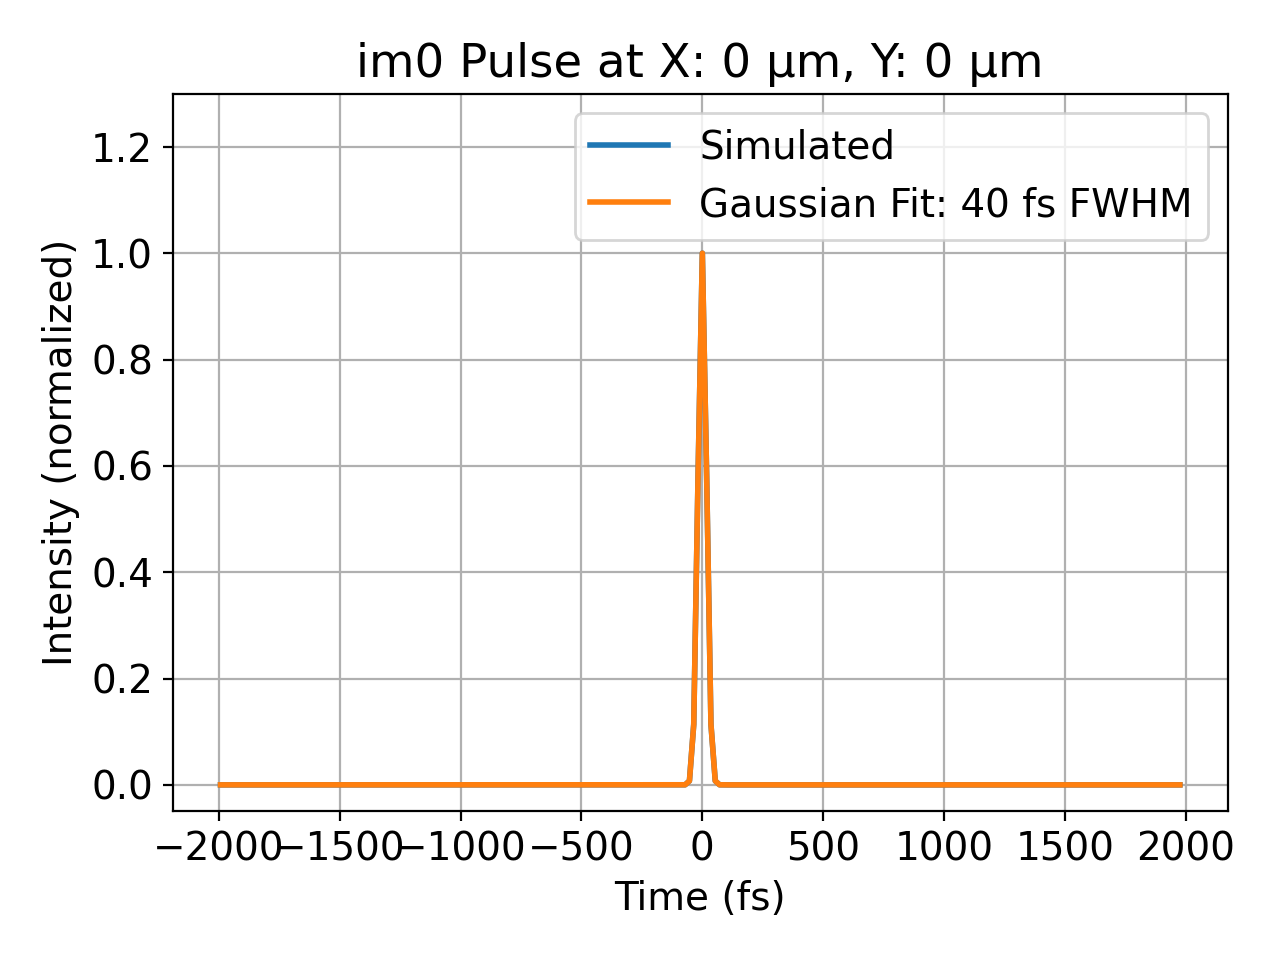

<IPython.core.display.Javascript object>


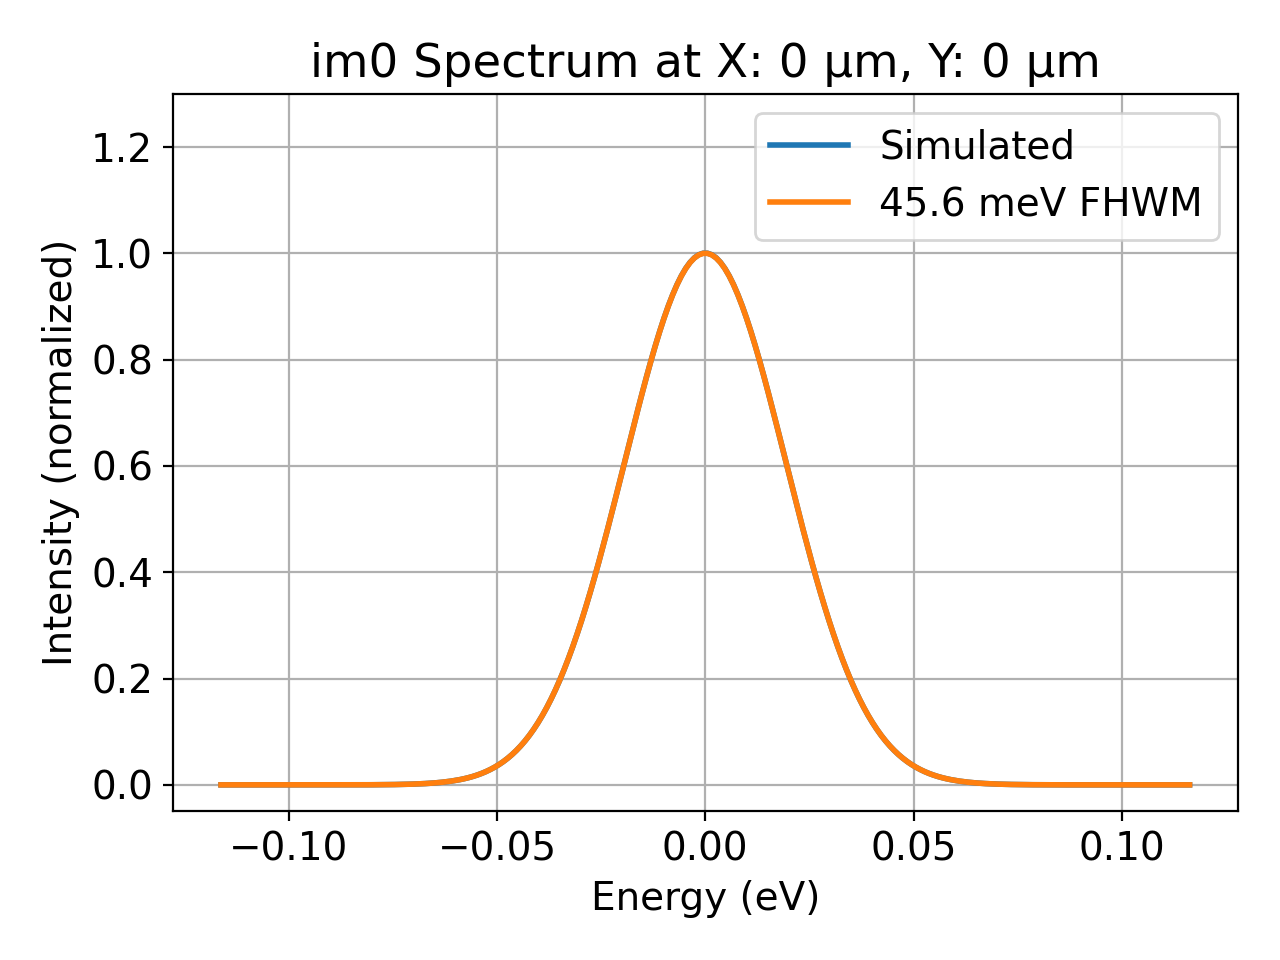

<IPython.core.display.Javascript object>


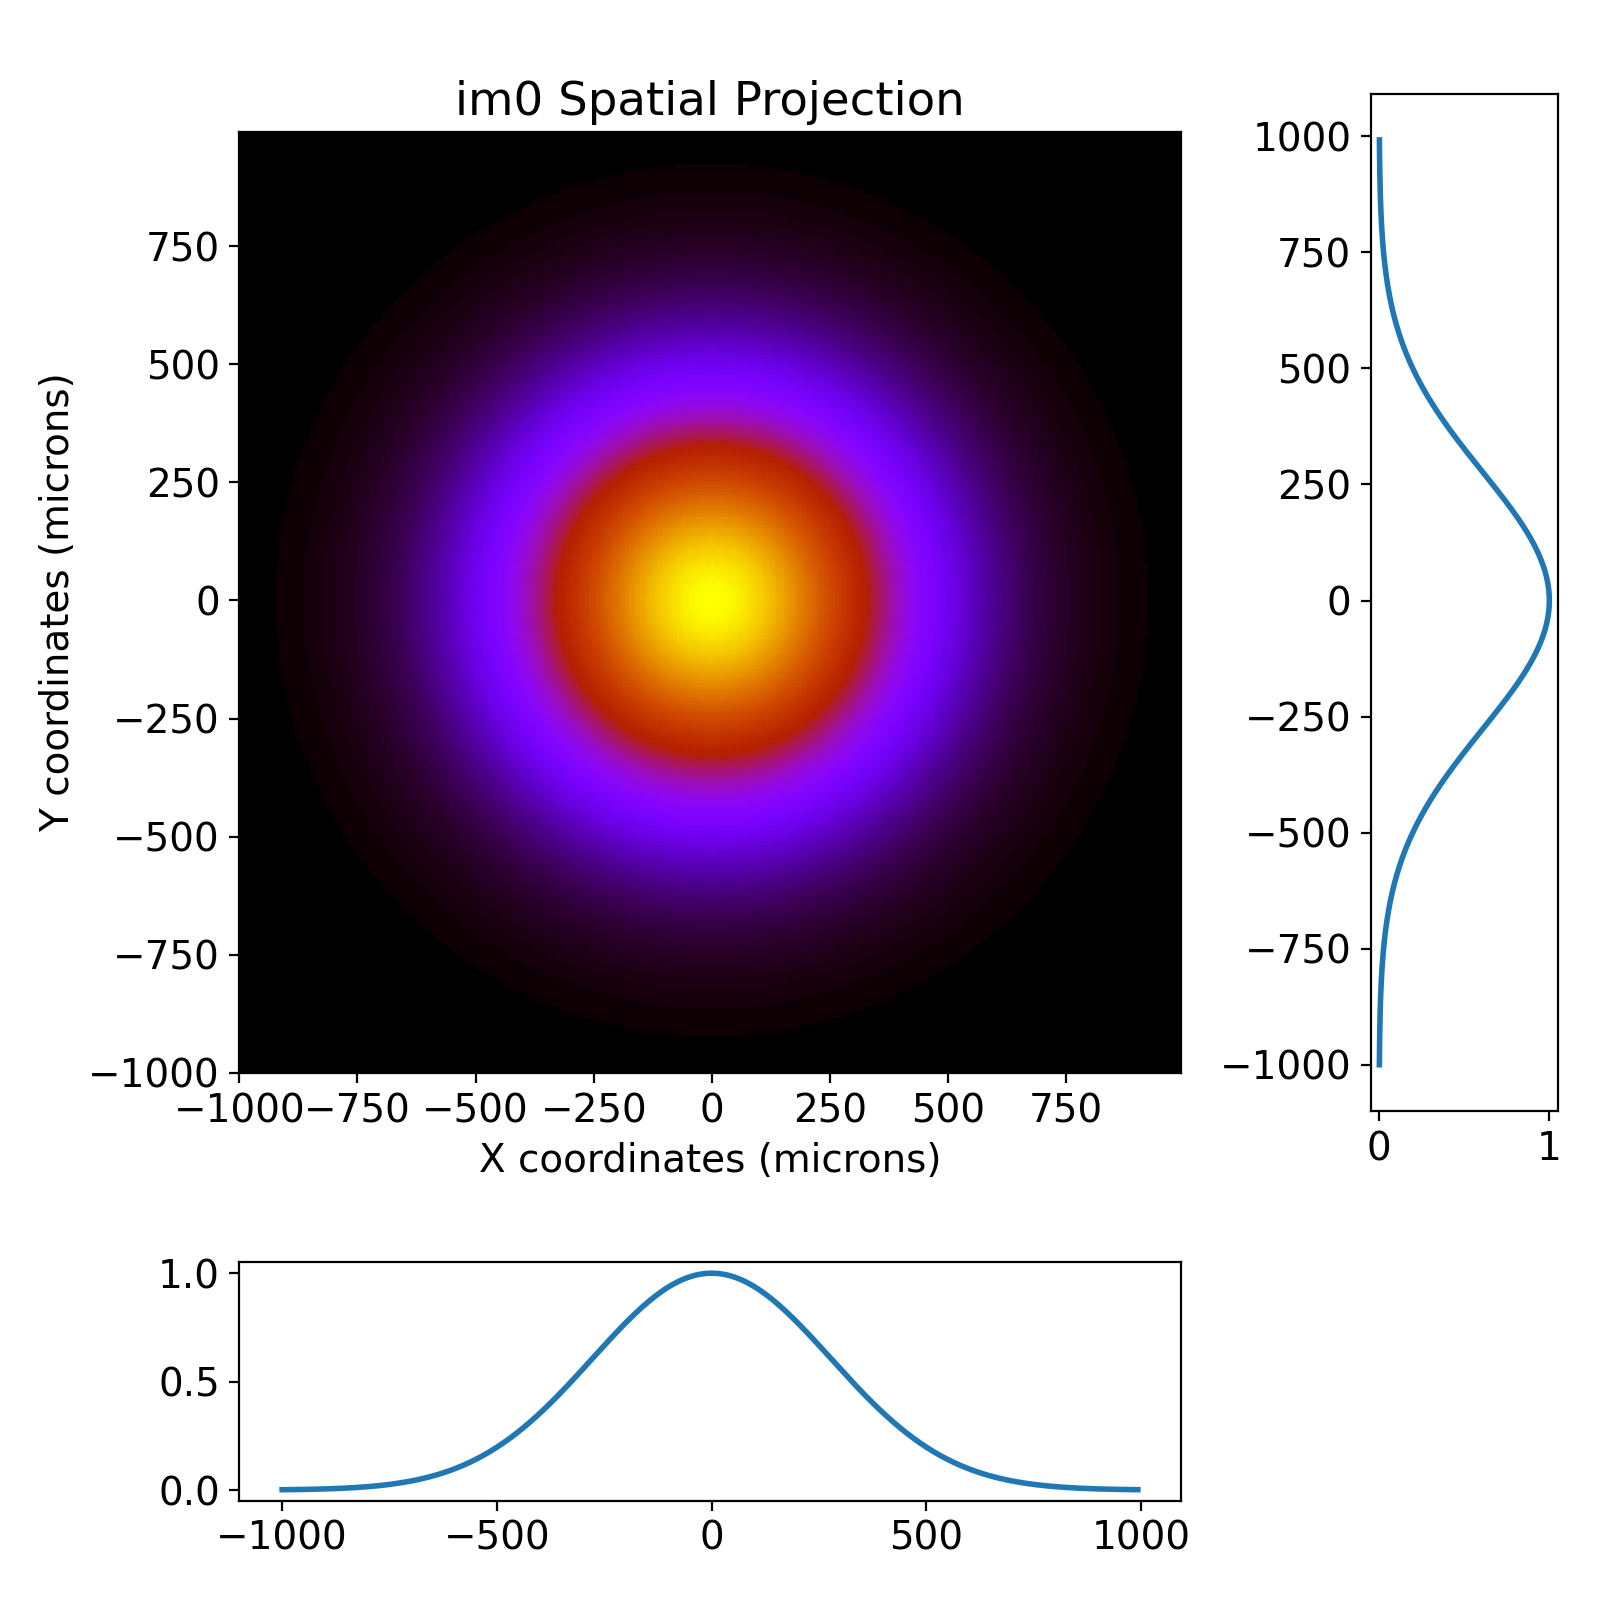

(<matplotlib.axes._subplots.AxesSubplot at 0x125d095f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126ec1dd8>)

In [29]:
# plot input pulse at beam center
pulse.plot_pulse('im0')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plot input beam spatial projection
pulse.imshow_projection('im0')

### Visualize focus properties

<IPython.core.display.Javascript object>


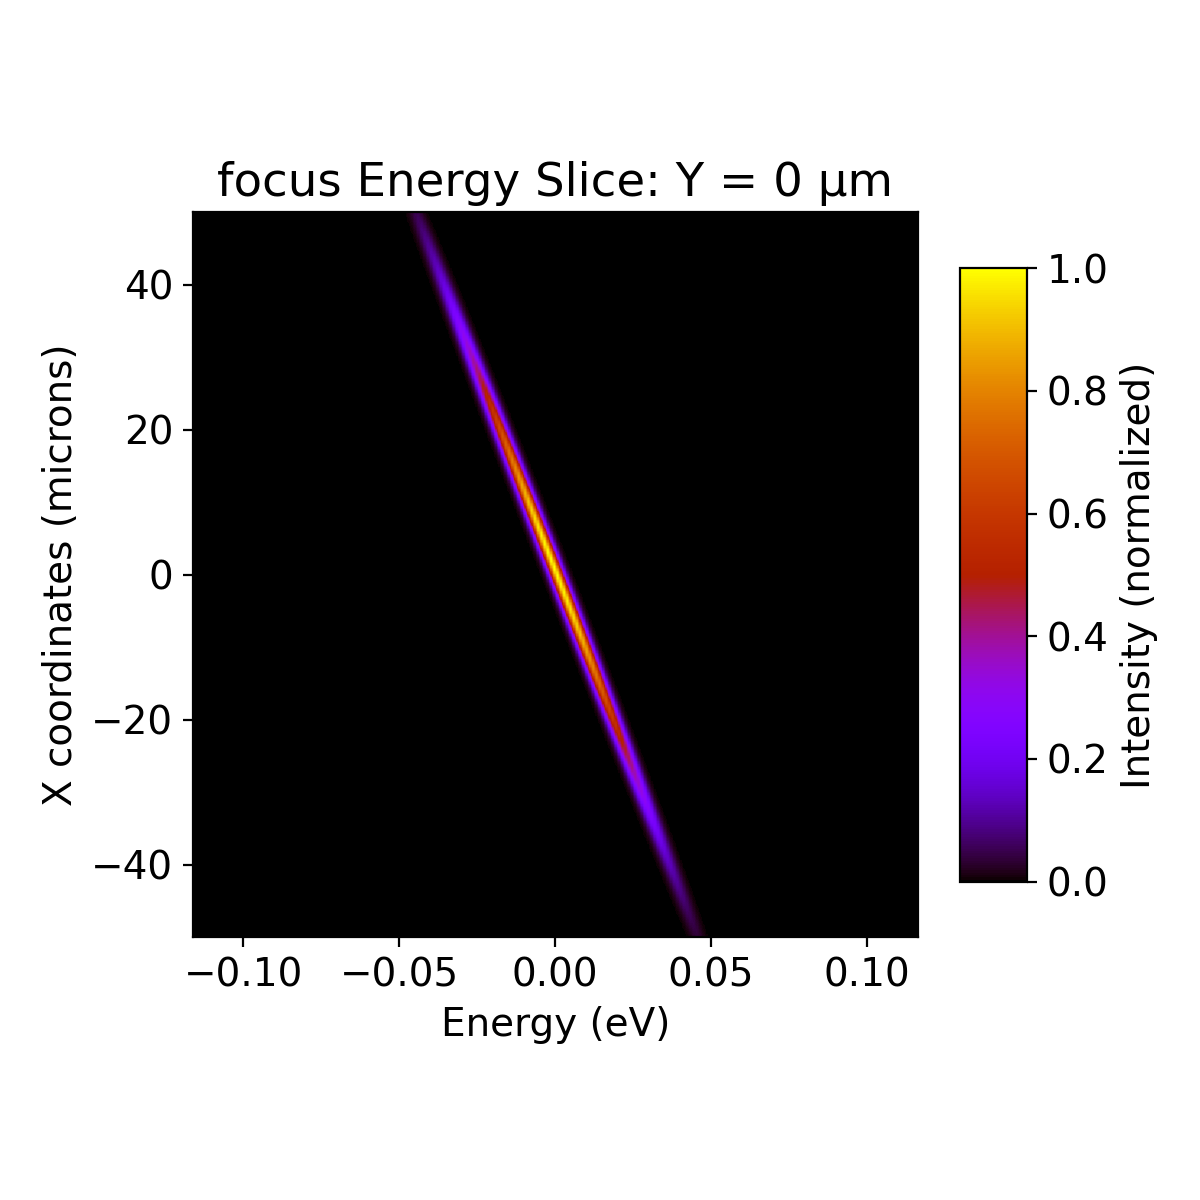

<IPython.core.display.Javascript object>


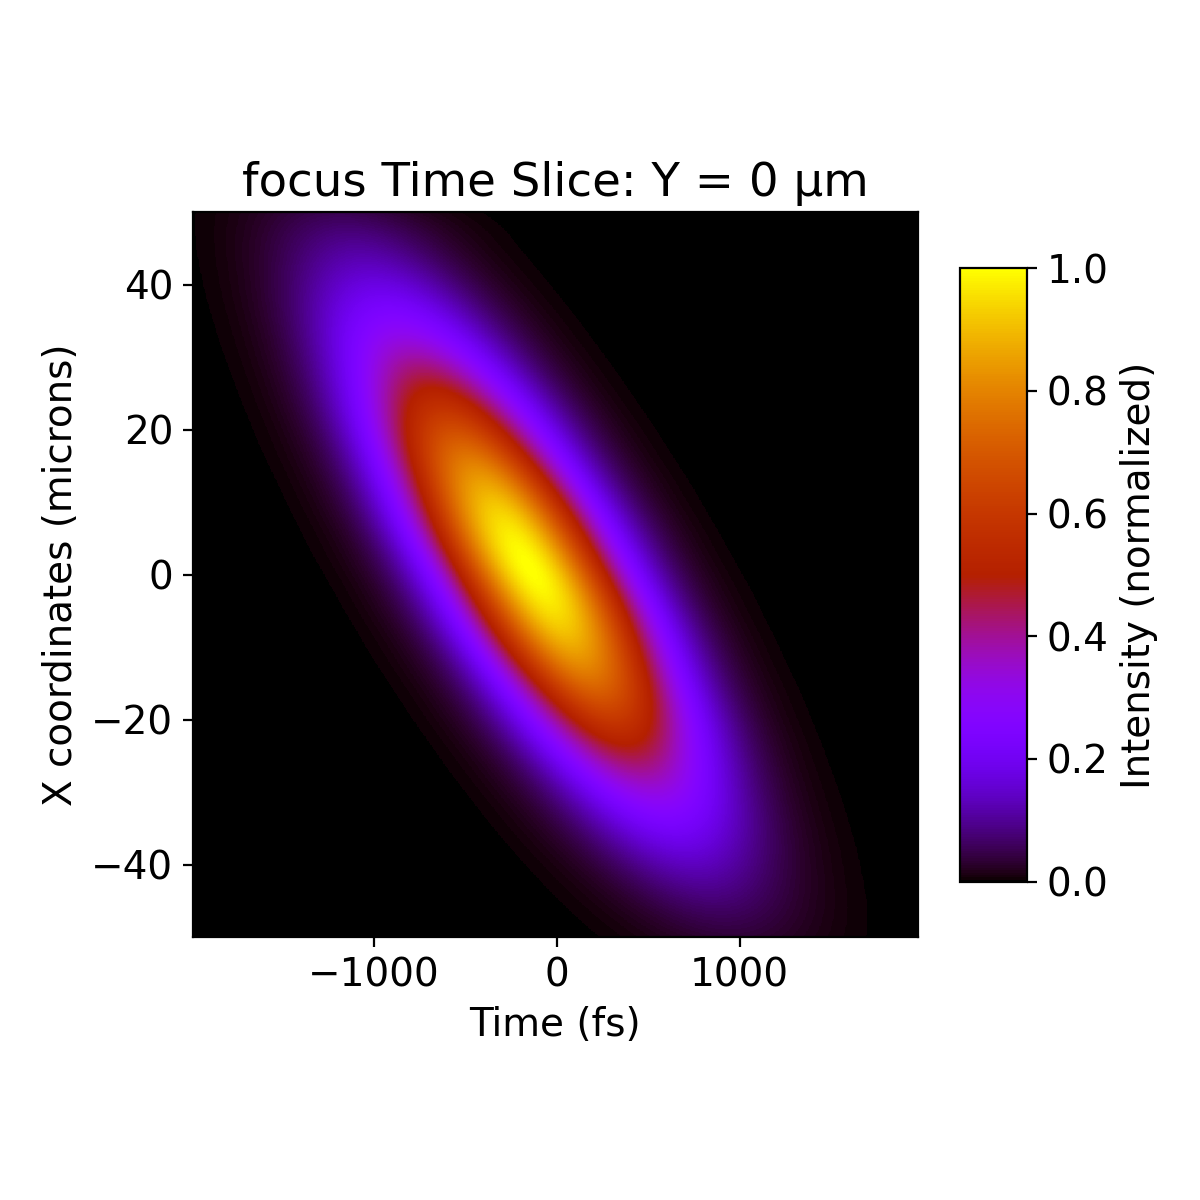

128


<IPython.core.display.Javascript object>


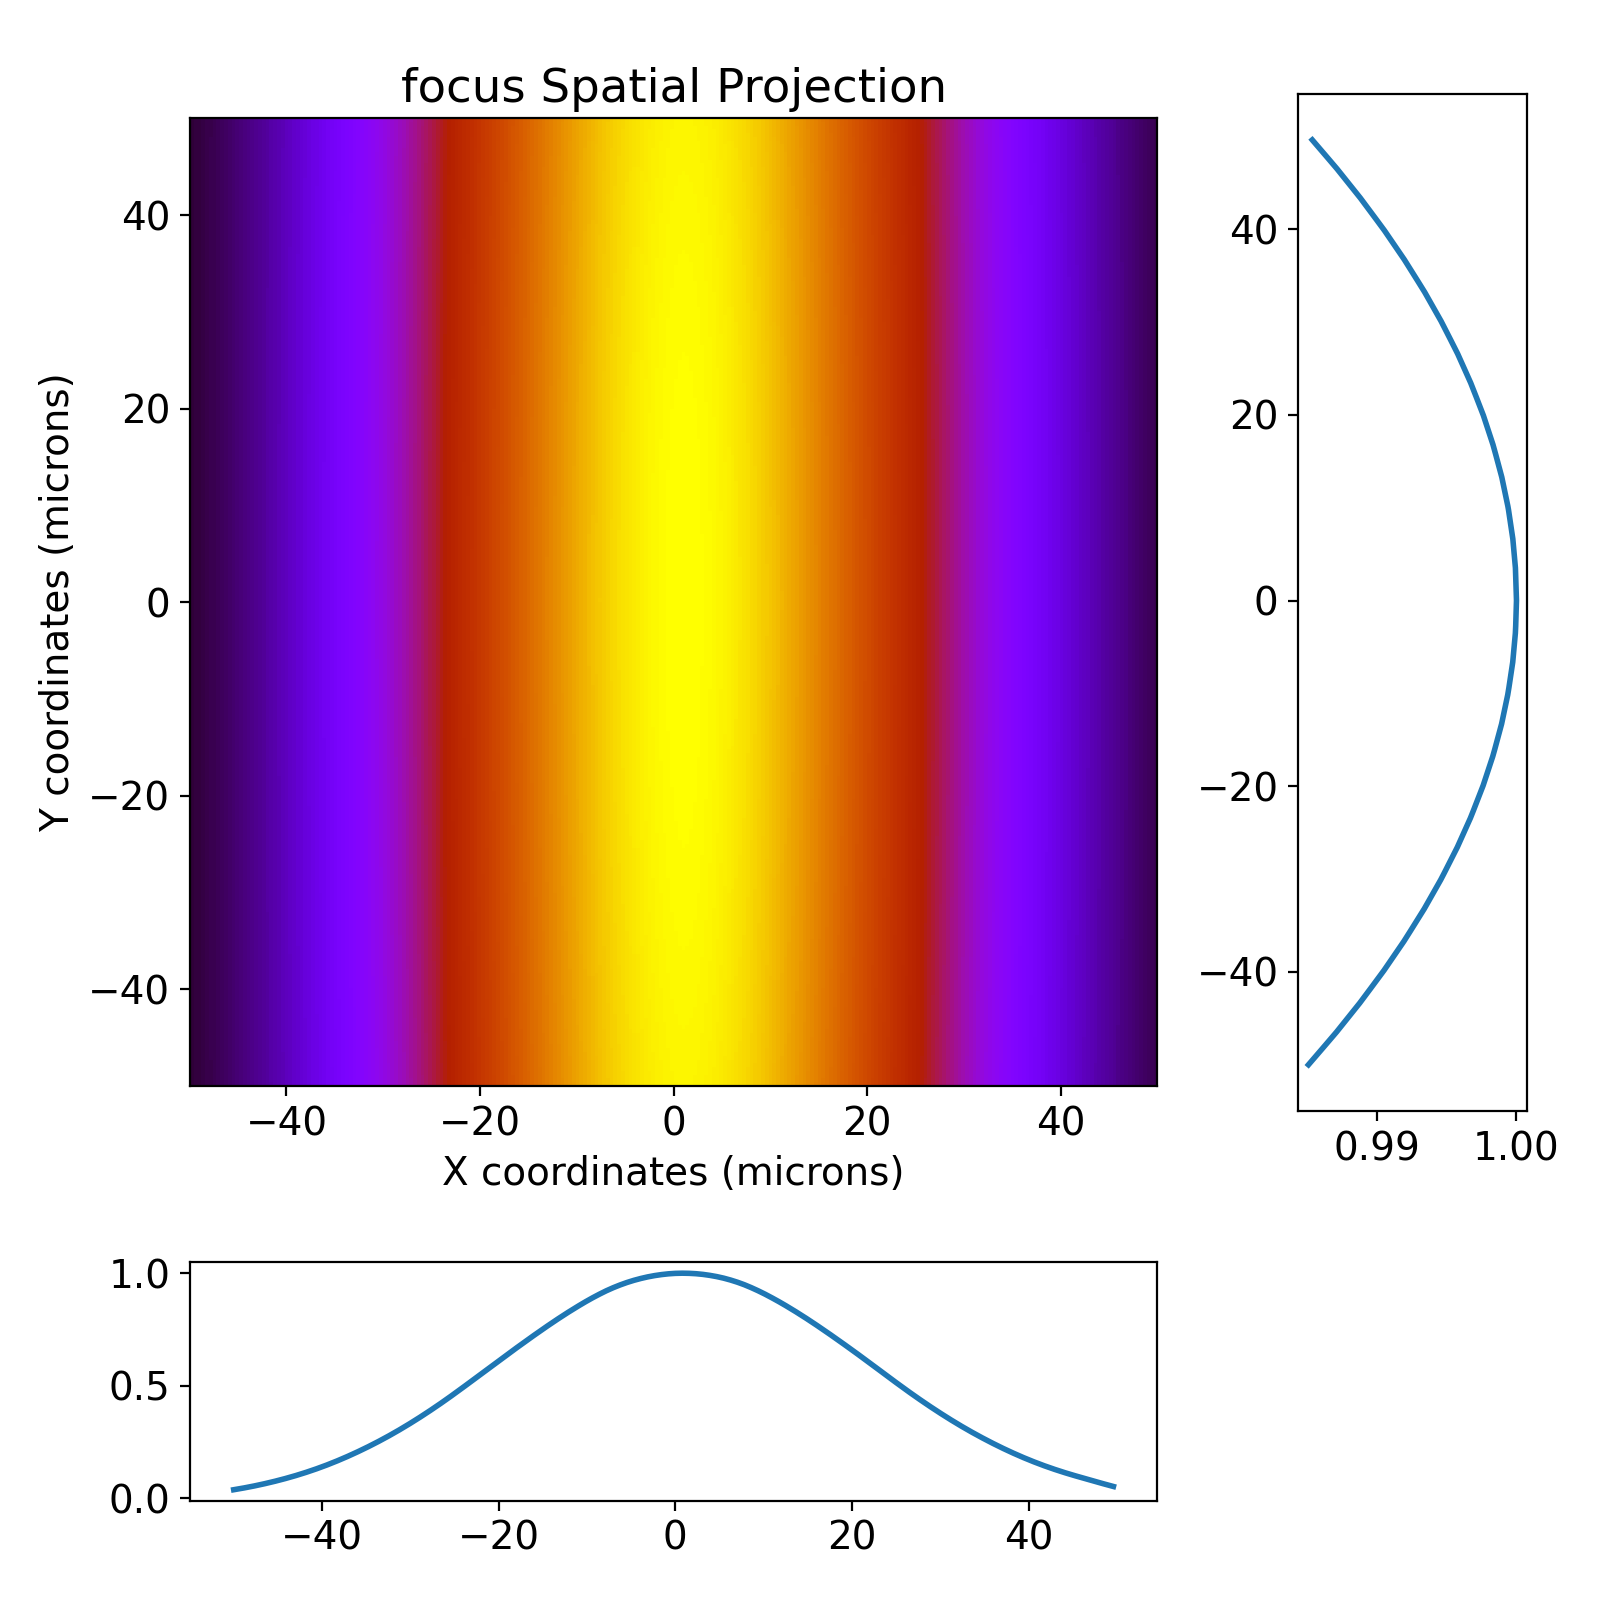

(<matplotlib.axes._subplots.AxesSubplot at 0x1272fcac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127338080>)

In [30]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=1200)
# show spatial projection
pulse.imshow_projection('focus')

### Visualize output

<IPython.core.display.Javascript object>


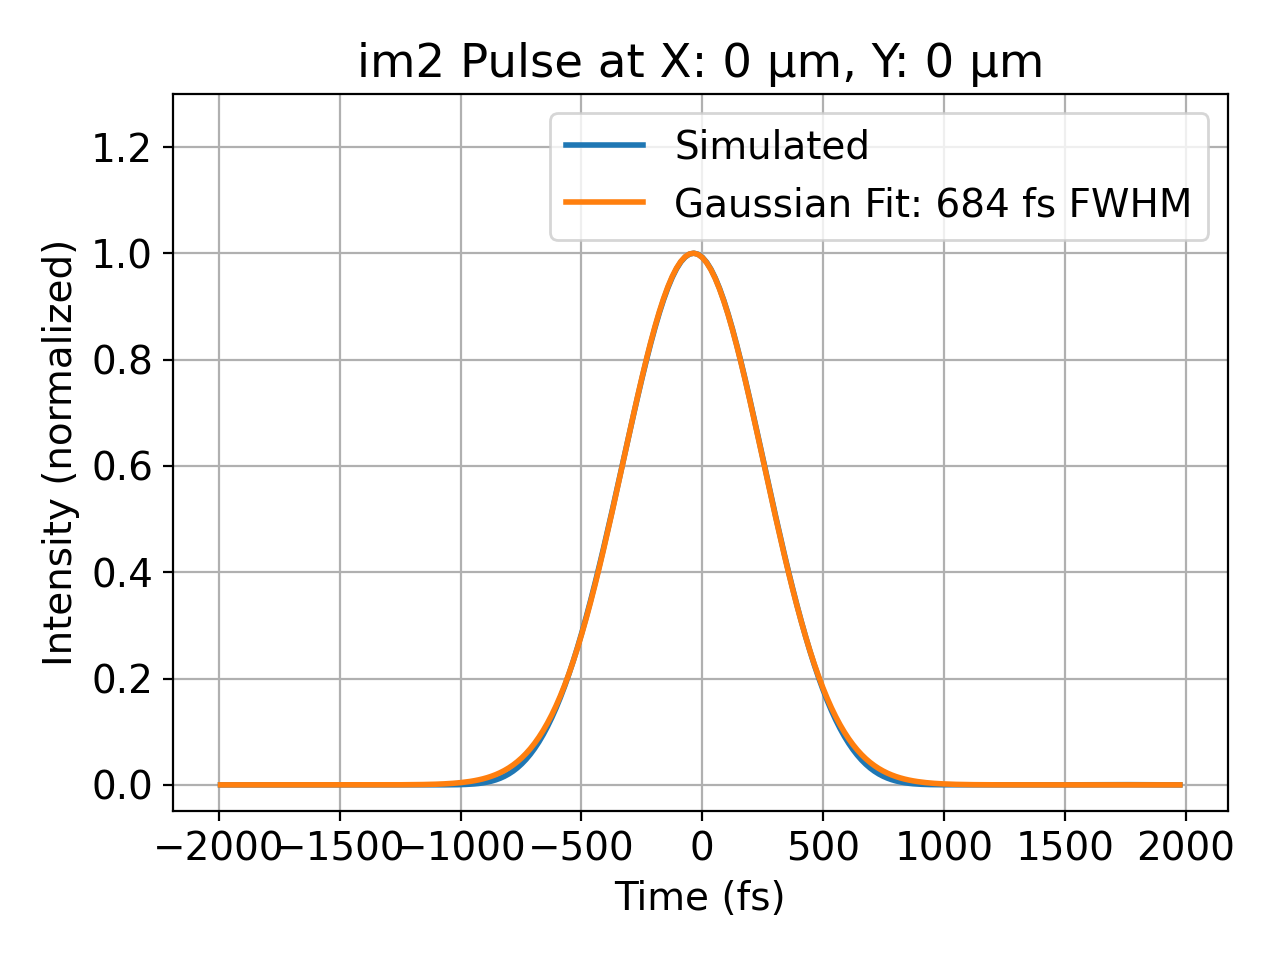

<IPython.core.display.Javascript object>


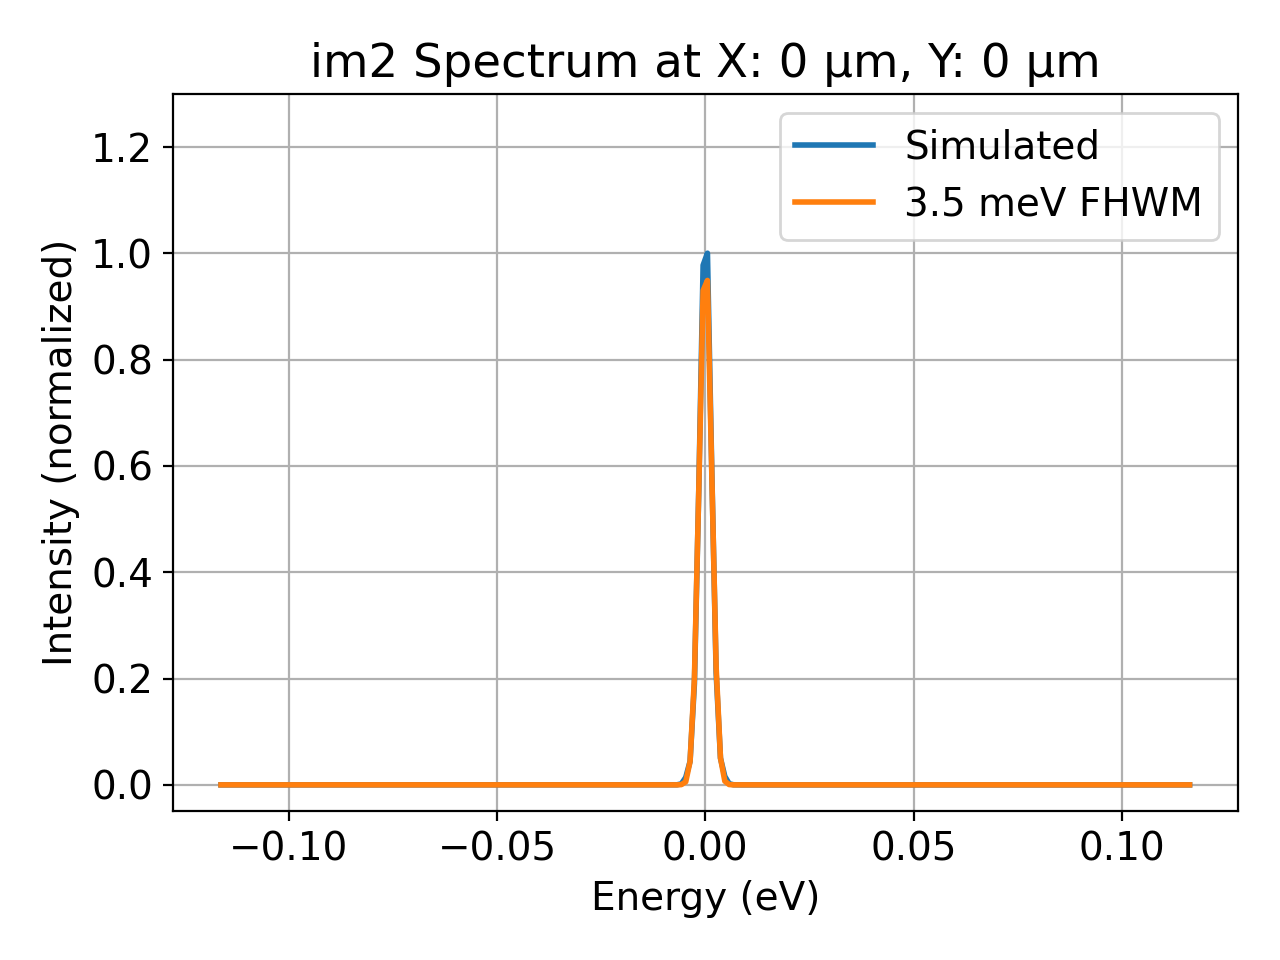

<IPython.core.display.Javascript object>


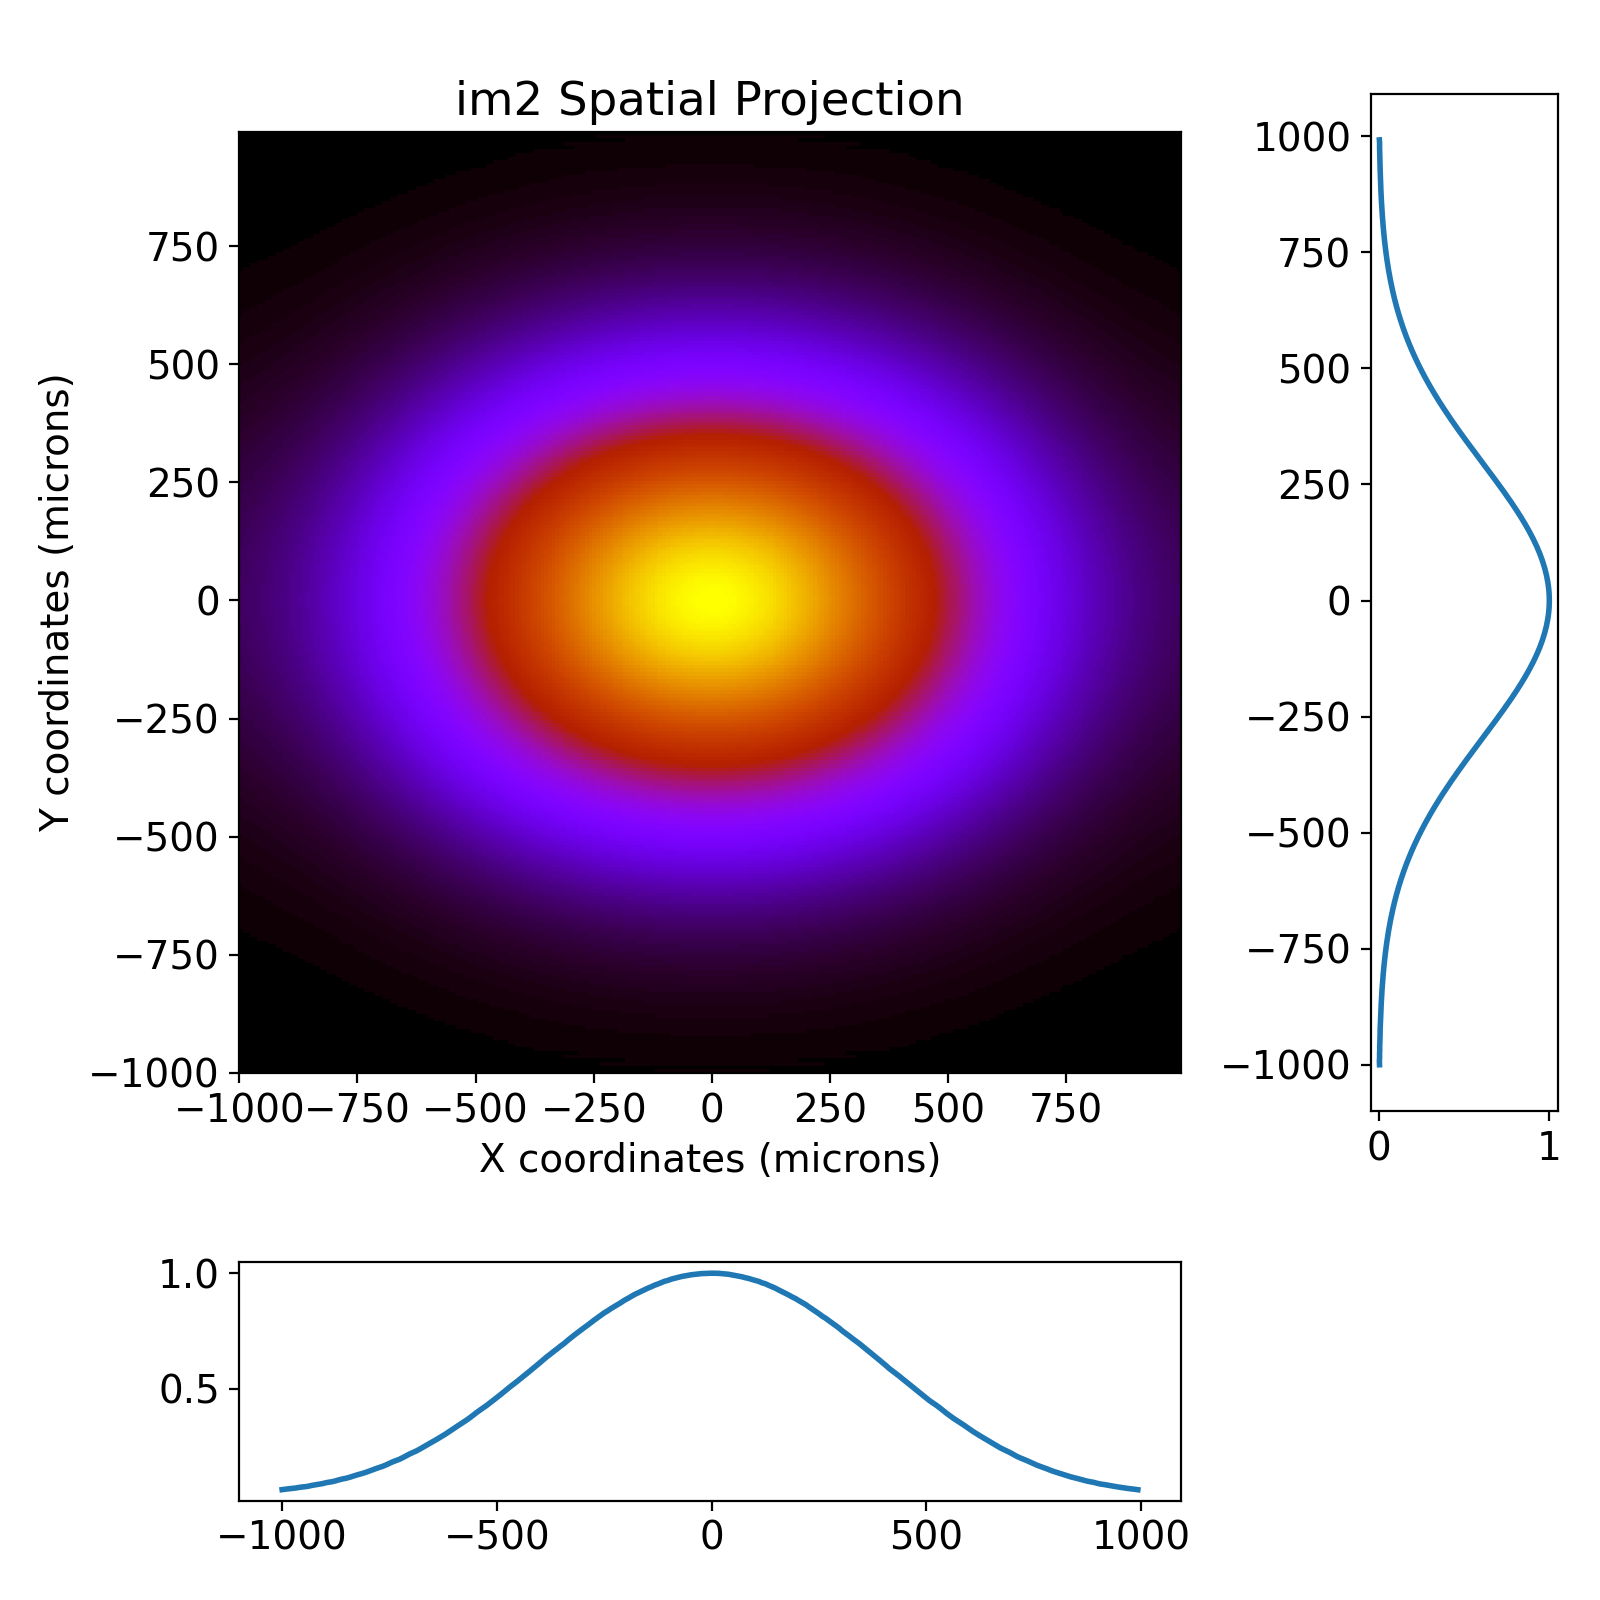

<IPython.core.display.Javascript object>


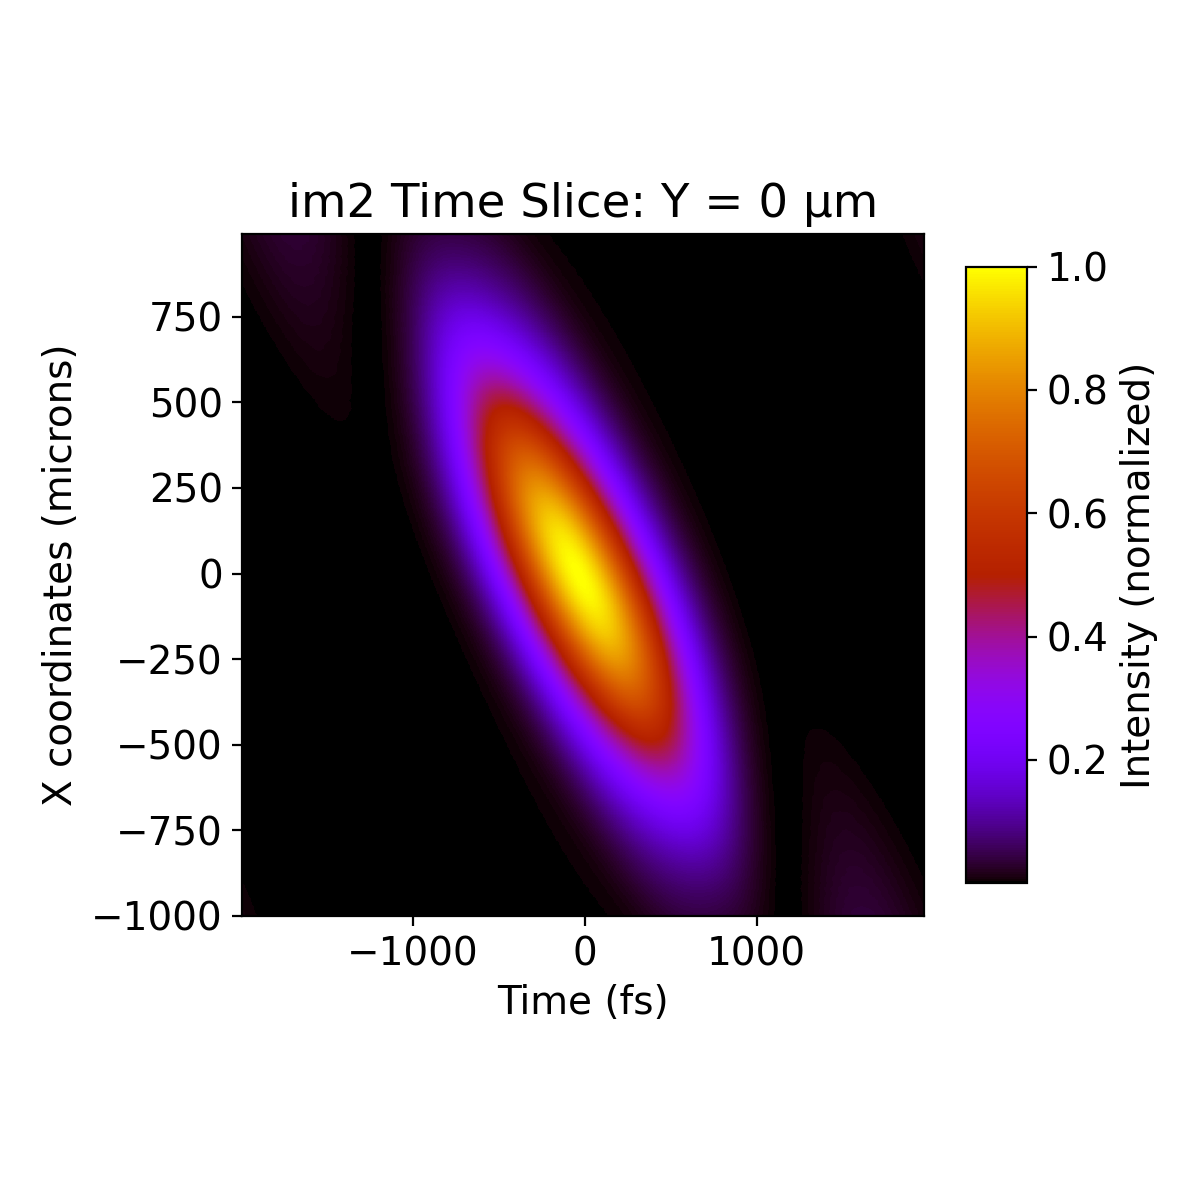

128


<IPython.core.display.Javascript object>


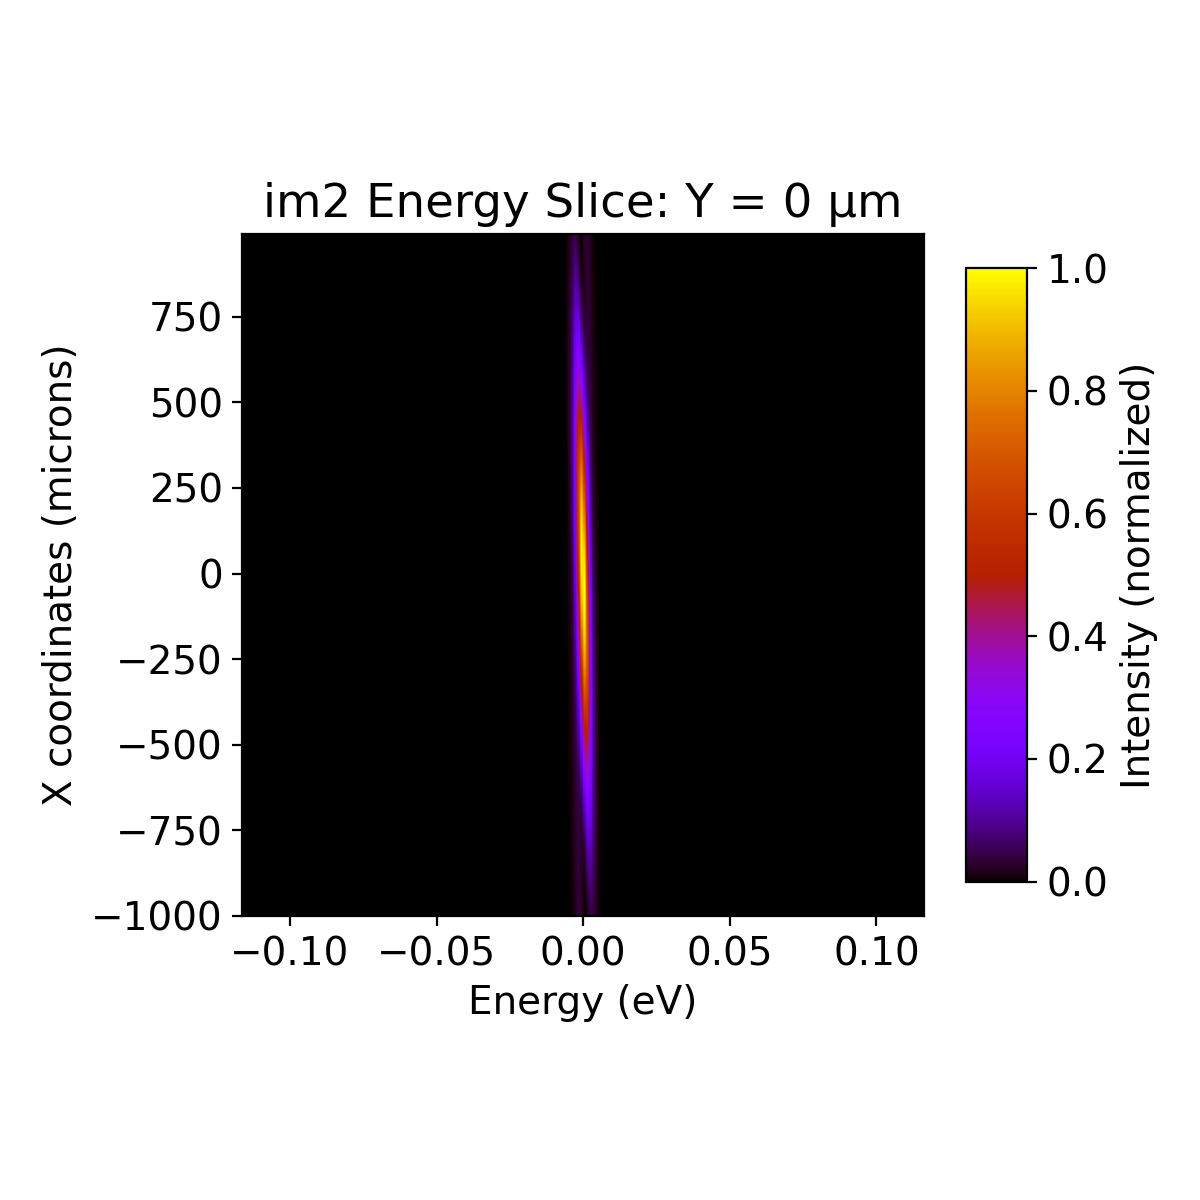

<IPython.core.display.Javascript object>


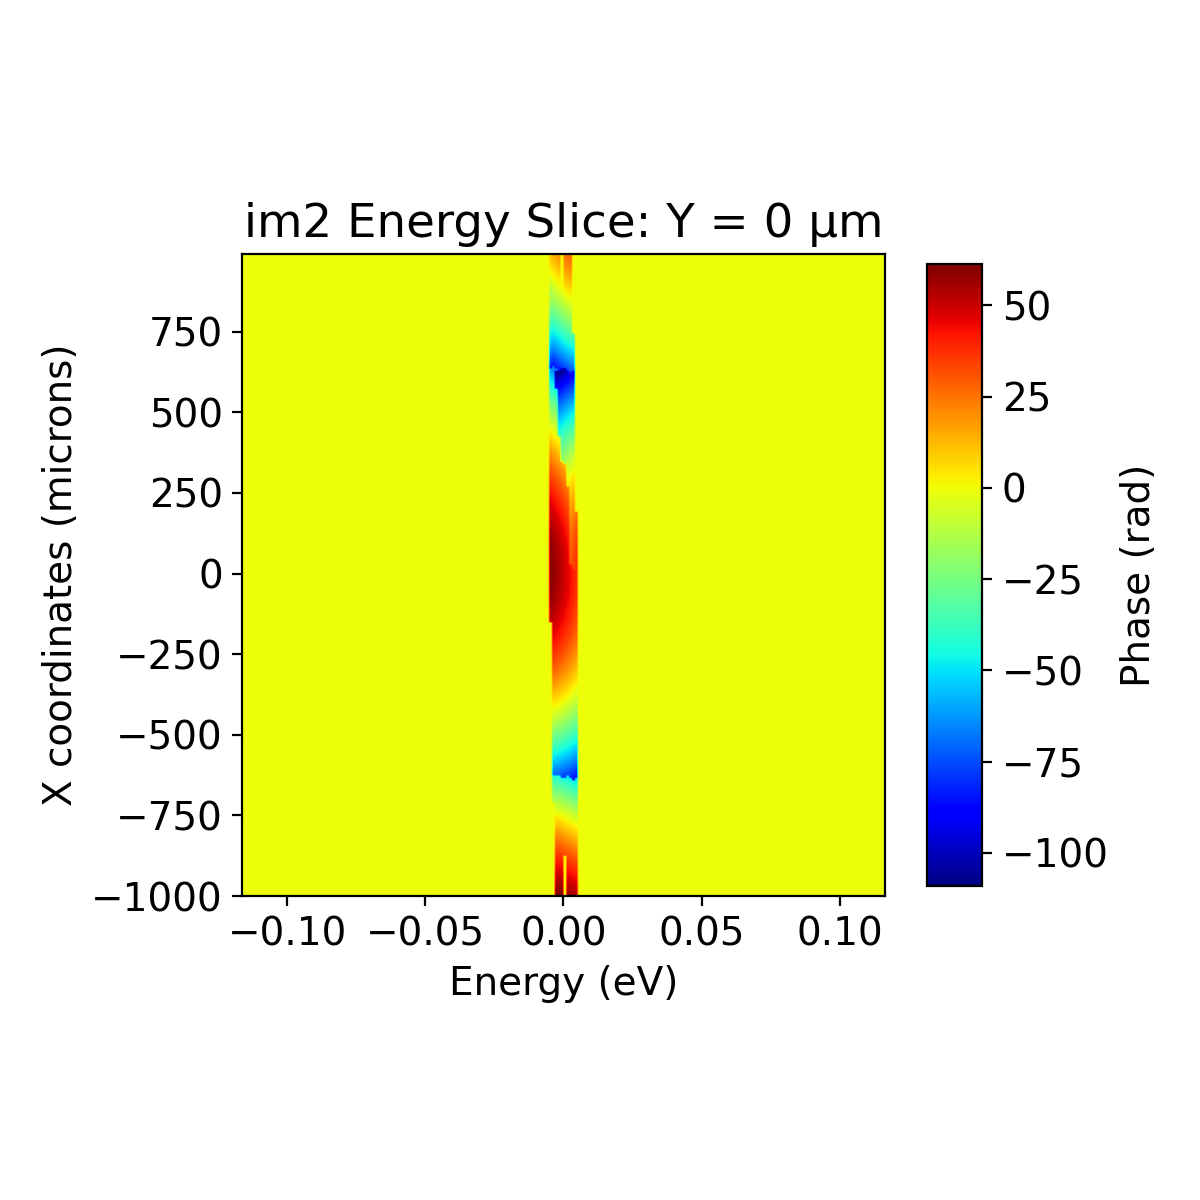

In [32]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=1600)
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# show spatial projection of output
pulse.imshow_projection('im2')
# show time slice of output
pulse.imshow_time_slice('im2', shift=1600)
# show energy slice of output
pulse.imshow_energy_slice('im2')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09


In [8]:
1/(1/6+1/3)

2.0

In [34]:
37/20

1.85

In [11]:
400/8

50.0

In [32]:
9*2/20

0.9